In [55]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [56]:
# Loading the dataset
df=pd.read_csv("/content/heart_disease_uci.csv")
df.head(10)

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
5   6   56    Male  Cleveland  atypical angina     120.0  236.0  False   
6   7   62  Female  Cleveland     asymptomatic     140.0  268.0  False   
7   8   57  Female  Cleveland     asymptomatic     120.0  354.0  False   
8   9   63    Male  Cleveland     asymptomatic     130.0  254.0  False   
9  10   53    Male  Cleveland     asymptomatic     140.0  203.0   True   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   
5          normal   178.0  False      0.8    upsloping  0.0   
6  lv hypertrophy   160.0  False      3.6  downsloping  2.0   
7          normal   163.0   True      0.6    upsloping  0.0   
8  lv hypertrophy   147.0  False      1.4         flat  1.0   
9  lv hypertrophy   155.0   True      3.1  downsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
5             normal    0  
6             normal    3  
7             normal    0  
8  reversable defect    2  
9  reversable defect    1

In [57]:
# Step 1: Basic Information and Overview
print("\nDataset Information:")
df.info()
print("\nFirst Few Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

First Few Rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Ma

In [58]:
df.count()

id          920
age         920
sex         920
dataset     920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalch      865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [59]:
#Finding constant and monotonic features
constant_features = [col for col in df.columns if df[col].nunique() == 1]
monotonic_features = []
for col in df.columns:
    # Check if the column is monotonic increasing or decreasing
    if df[col].is_monotonic_increasing or df[col].is_monotonic_decreasing:
        monotonic_features.append(col)

print("Constant Features:", constant_features)
print("Monotonic Features:", monotonic_features)

#Removing the features
features_to_drop = constant_features + monotonic_features
df_cleaned = df.drop(columns=features_to_drop)
df_cleaned.head()


Constant Features: []
Monotonic Features: ['id', 'dataset']


age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  num  
0   150.0  False      2.3  downsloping  0.0       fixed defect    0  
1   108.0   True      1.5         flat  3.0             normal    2  
2   129.0   True      2.6         flat  2.0  reversable defect    1  
3   187.0  False      3.5  downsloping  0.0             normal    0  
4   172.0  False      1.4    upsloping  0.0             normal    0

In [60]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Get columns with missing values
columns_with_missing_values = [col for col in df.columns if df[col].isnull().any()]
print("Columns with missing values:", columns_with_missing_values)



Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Columns with missing values: ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [61]:
# # Dropping columns with more than 50% missing values
# threshold = 0.5 * len(df)
# df = df.dropna(thresh=threshold, axis=1)

# # Separate categorical and numerical columns
# numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# # Impute missing values
# for col in numerical_cols:
#     df[col] = df[col].fillna(df[col].mean())   # Mean imputation for numerical

# # Check for any remaining missing values
# print("Missing values after imputation:\n", df.isnull().sum())

In [62]:
# ... existing code ...

# Separate categorical and numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())   # Mean imputation for numerical

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])   # Mode imputation for categorical

print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<ipython-input-62-f34d80269524>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])   # Mode imputation for categorical


In [63]:
from sklearn.preprocessing import LabelEncoder

#Identify Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(categorical_cols)

label_encoders = {}  # Dictionary to store each LabelEncoder for each column

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string in case of mixed types
    label_encoders[col] = le  # Save the encoder for each column

# Display the transformed DataFrame
df.head()


['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']


id  age  sex  dataset  cp  trestbps   chol    fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0   True        0   150.0  False   
1   2   67    1        0   0     160.0  286.0  False        0   108.0   True   
2   3   67    1        0   0     120.0  229.0  False        0   129.0   True   
3   4   37    1        0   2     130.0  250.0  False        1   187.0  False   
4   5   41    0        0   1     130.0  204.0  False        0   172.0  False   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0

In [64]:
#Converting Categorical Data to Numeric
encoded_data = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nData after encoding categorical variables:")
print(encoded_data.head())


Data after encoding categorical variables:
   id  age  trestbps   chol    fbs  thalch  exang  oldpeak   ca  num  ...  \
0   1   63     145.0  233.0   True   150.0  False      2.3  0.0    0  ...   
1   2   67     160.0  286.0  False   108.0   True      1.5  3.0    2  ...   
2   3   67     120.0  229.0  False   129.0   True      2.6  2.0    1  ...   
3   4   37     130.0  250.0  False   187.0  False      3.5  0.0    0  ...   
4   5   41     130.0  204.0  False   172.0  False      1.4  0.0    0  ...   

   dataset_3   cp_1   cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  \
0      False  False  False   True      False      False    False    False   
1      False  False  False  False      False      False     True    False   
2      False  False  False  False      False      False     True    False   
3      False  False   True  False       True      False    False    False   
4      False   True  False  False      False      False    False     True   

   thal_1  thal_2  
0   False 

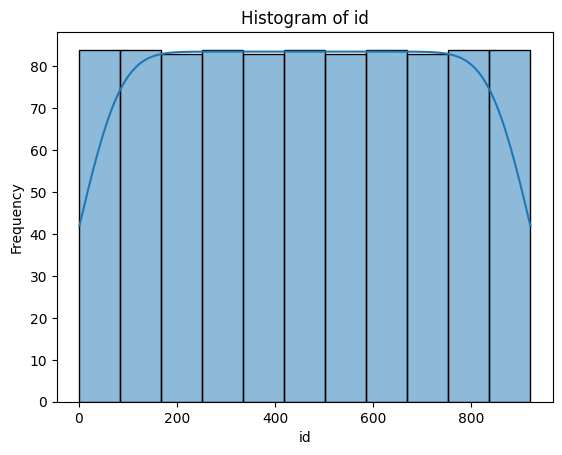

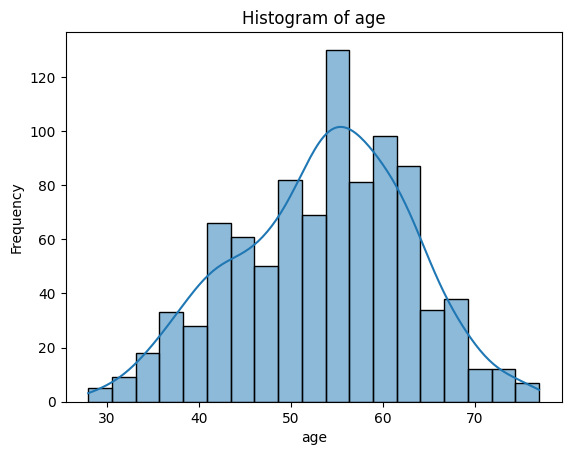

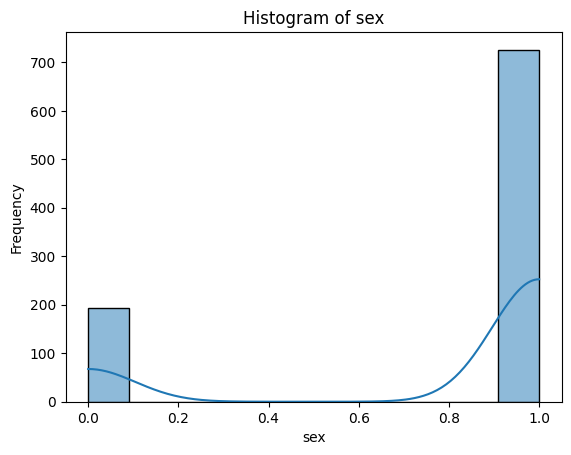

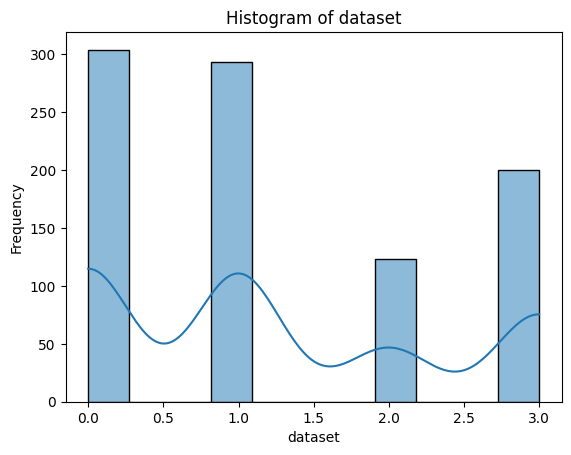

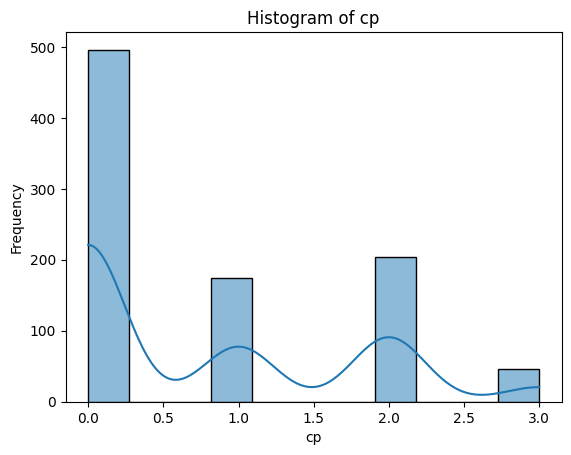

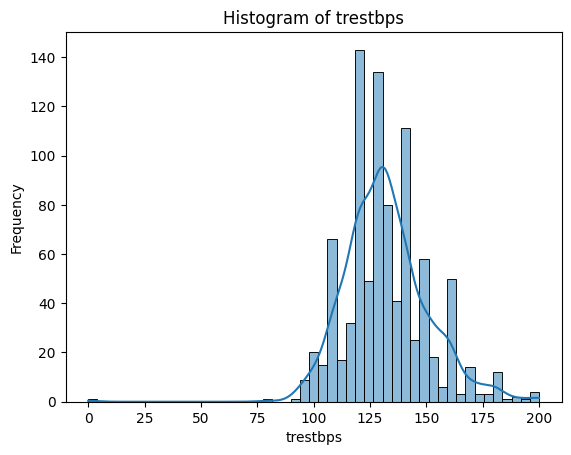

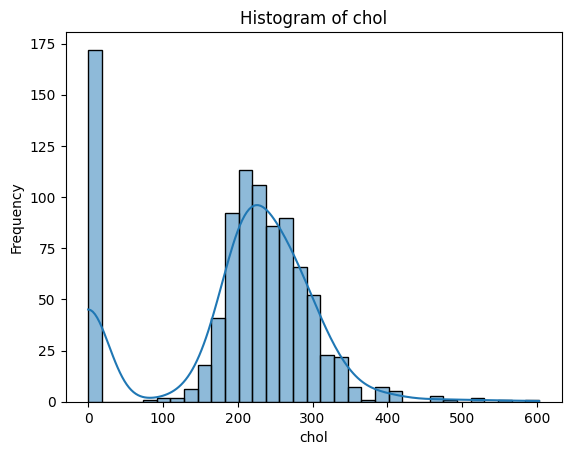

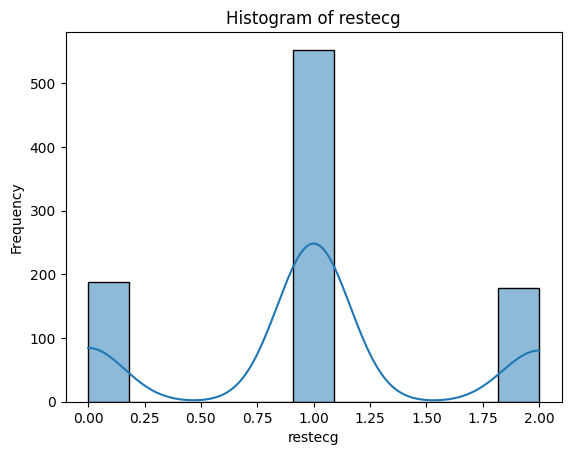

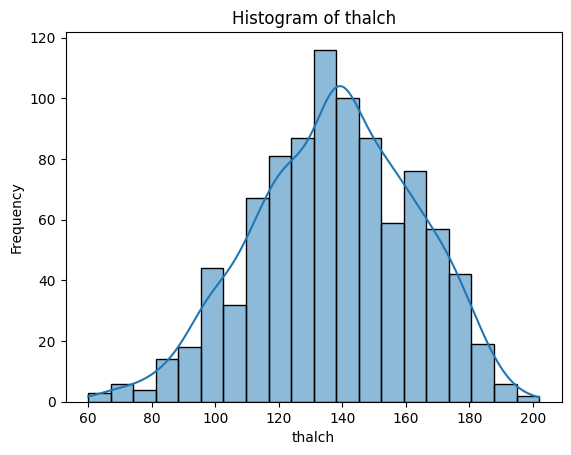

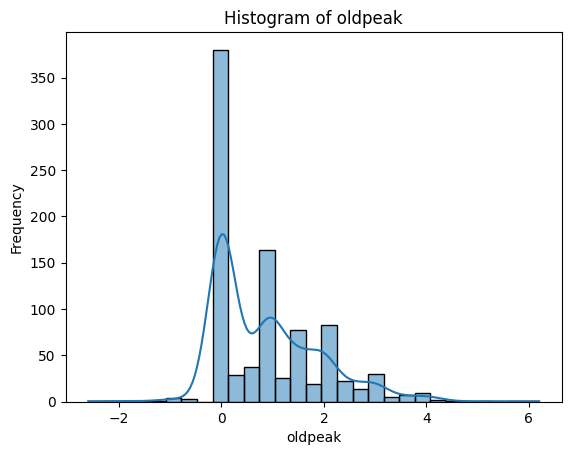

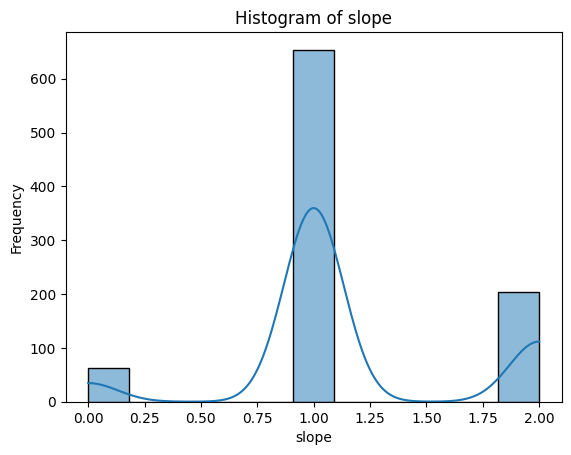

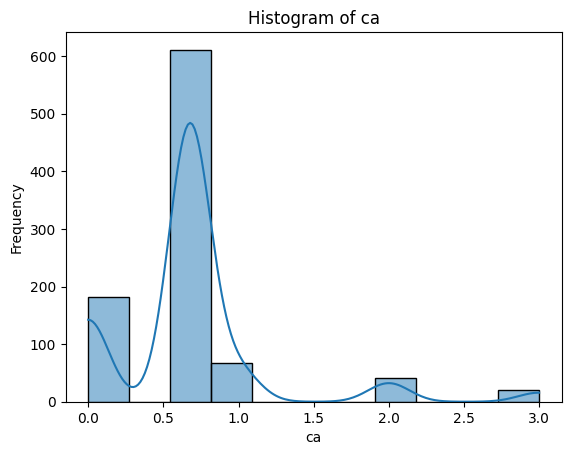

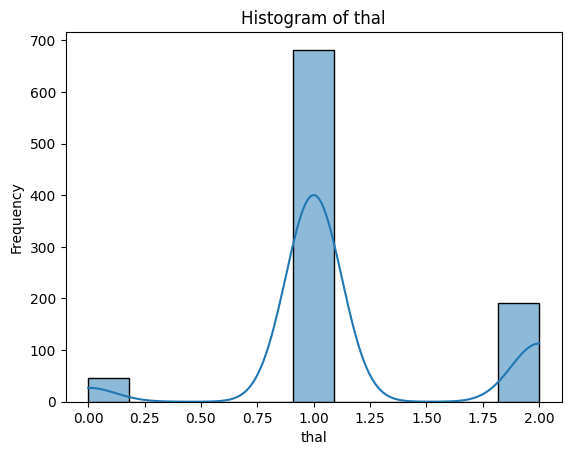

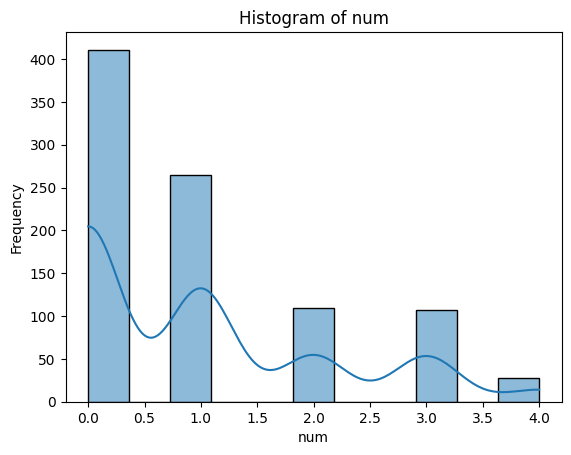

In [65]:
# Visualizing the Data

# Histogram of Numerical Features
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


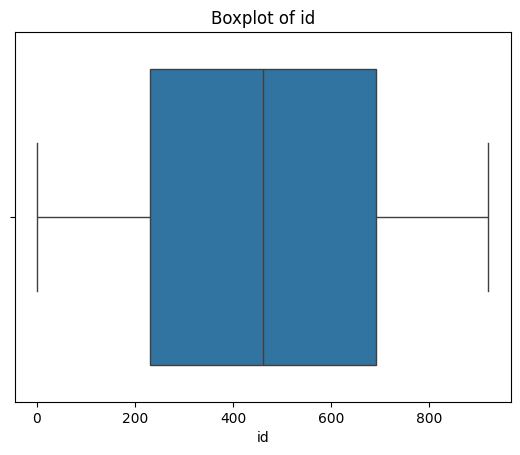

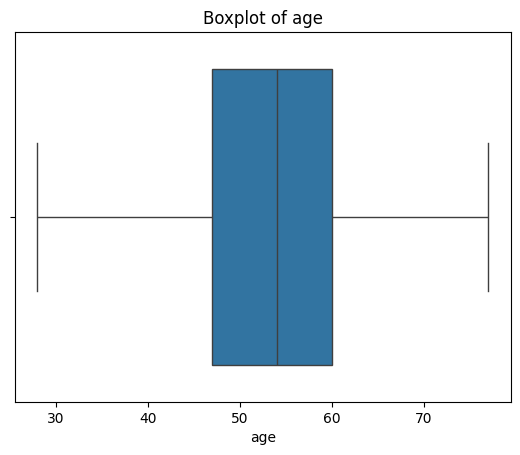

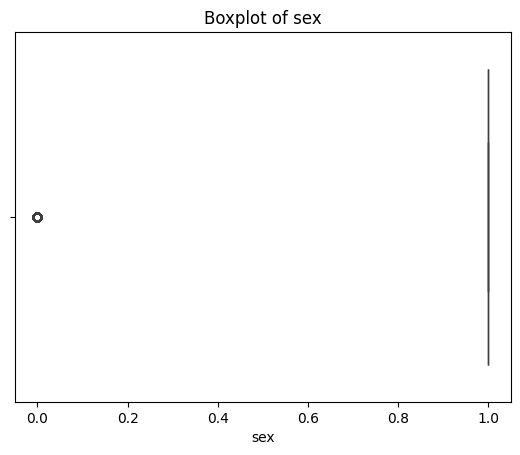

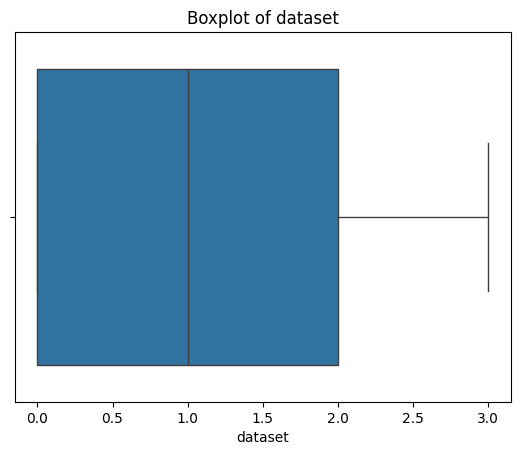

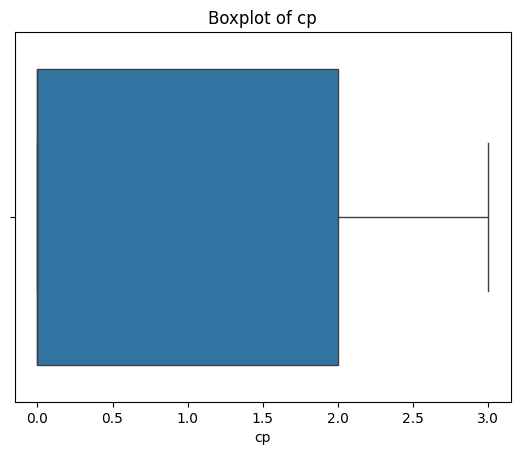

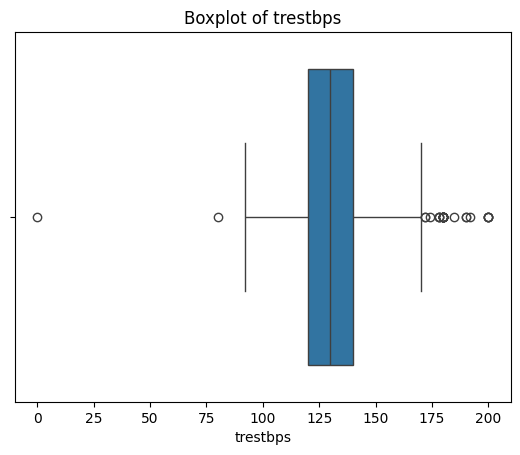

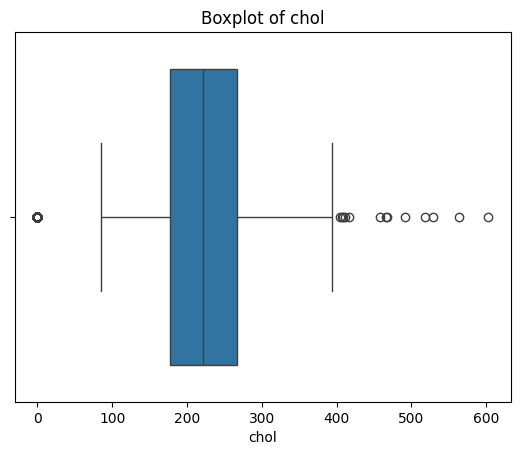

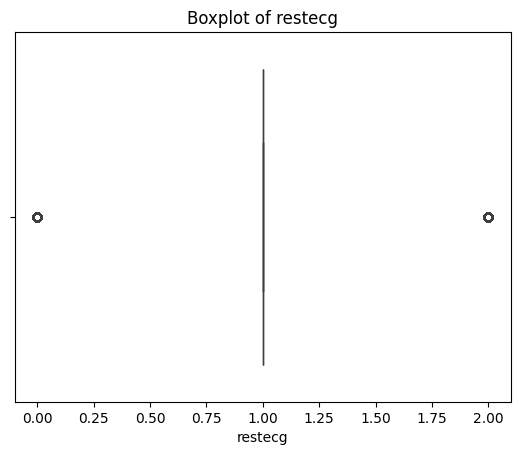

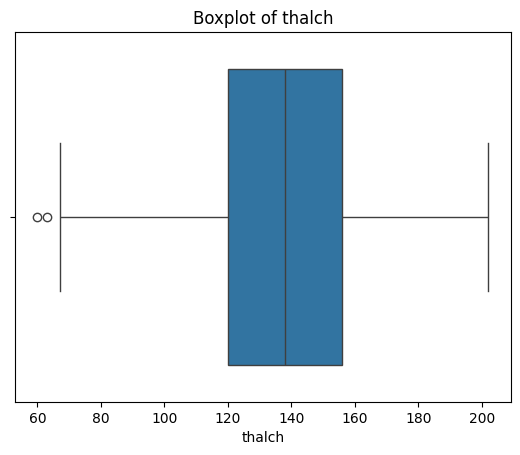

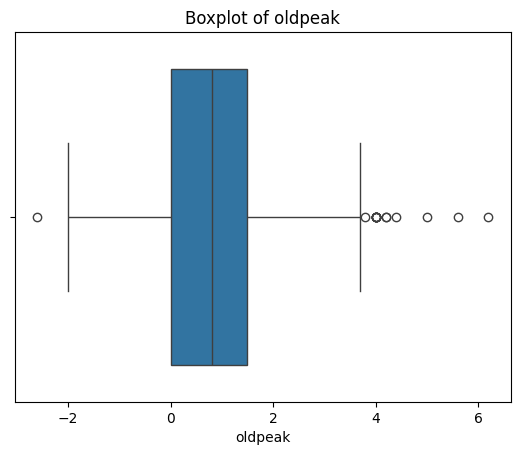

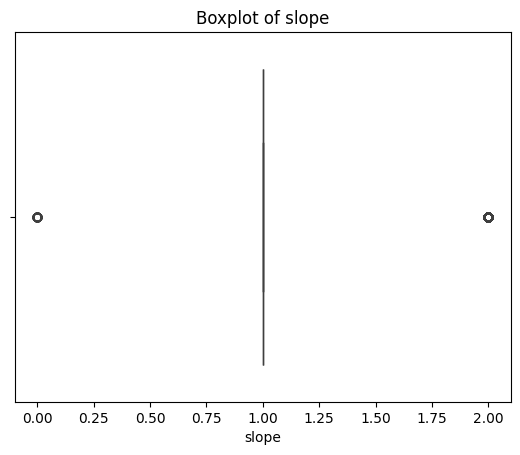

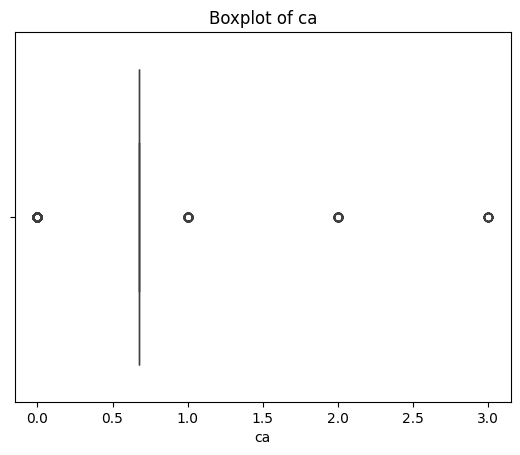

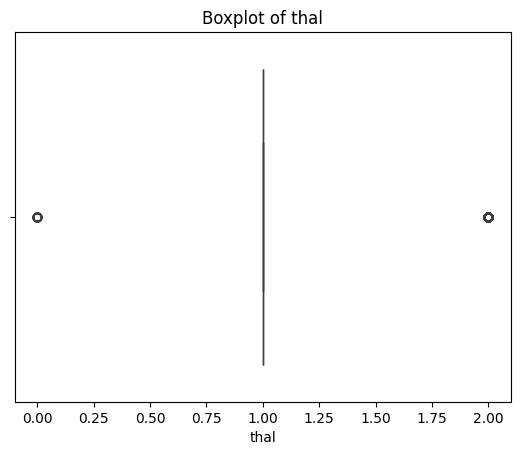

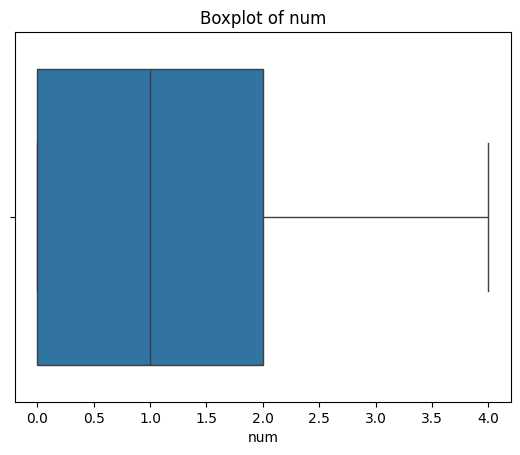

In [66]:
#Boxplots for Outliers Detection
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

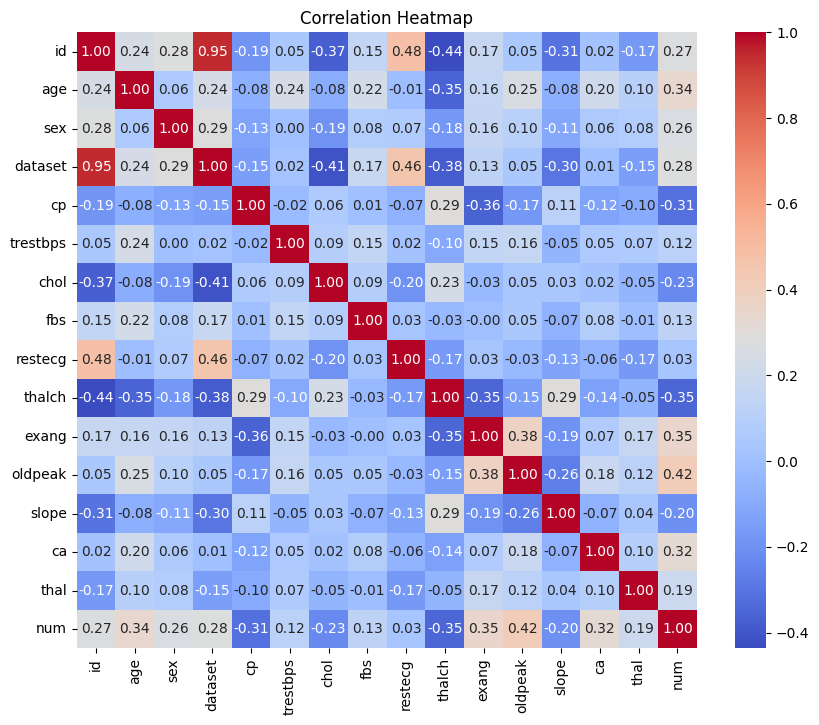

In [67]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



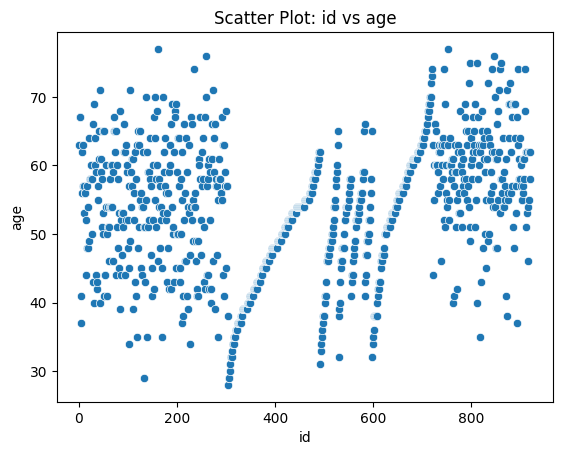

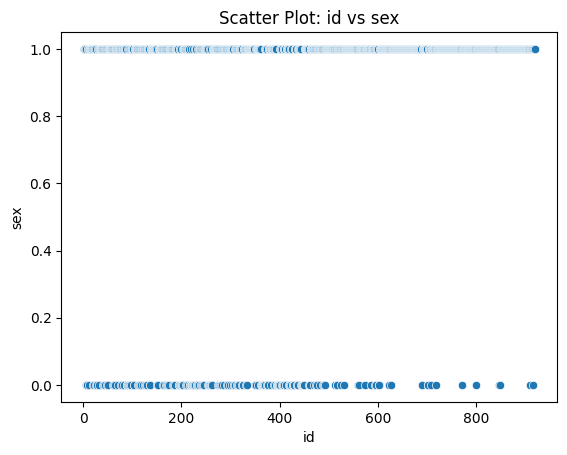

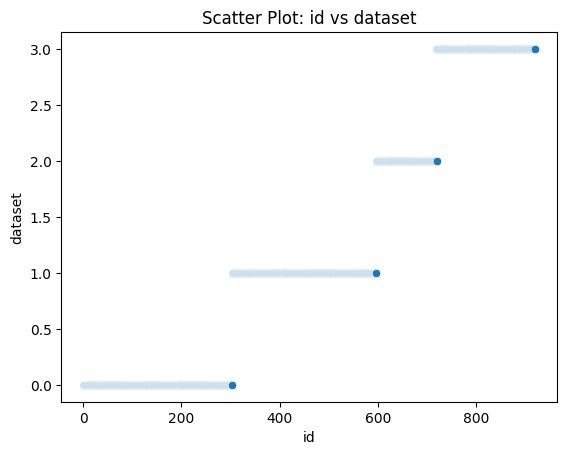

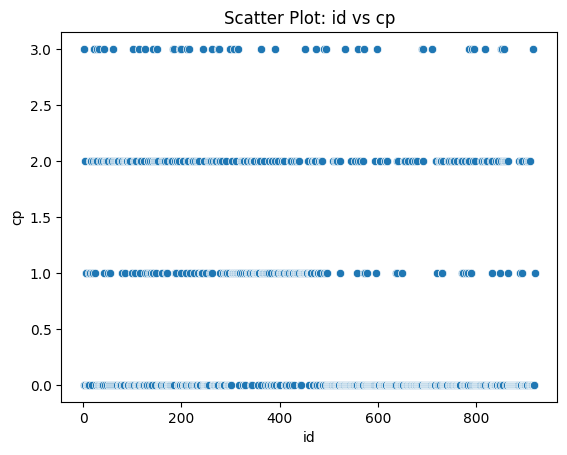

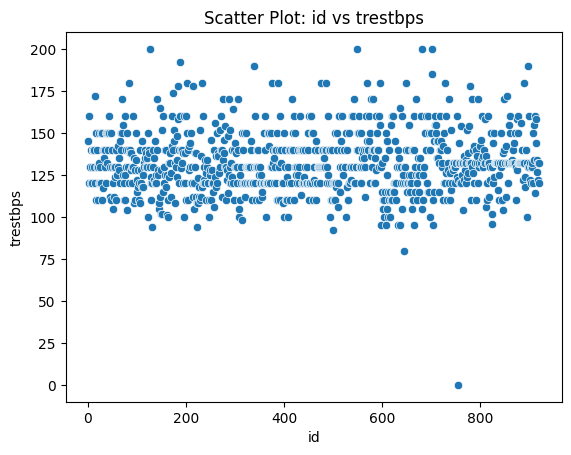

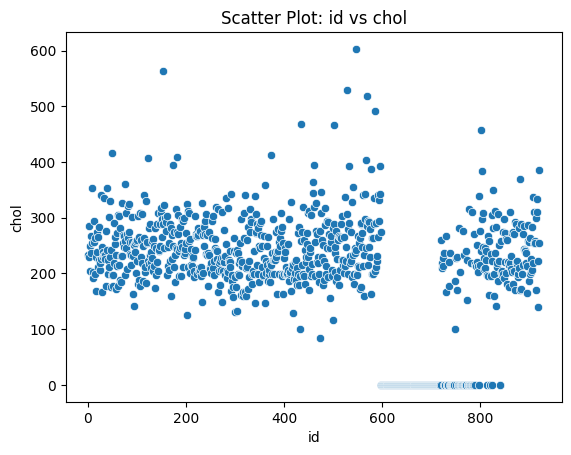

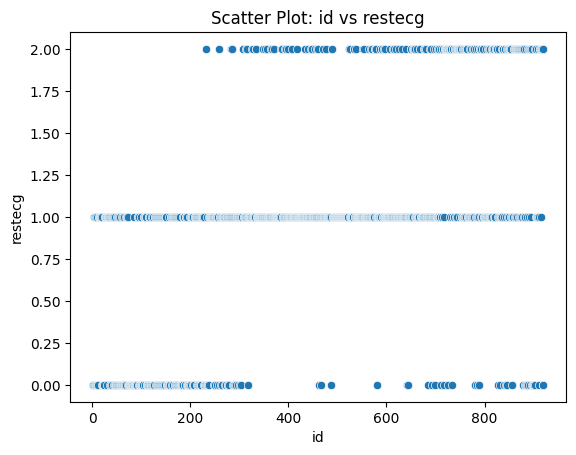

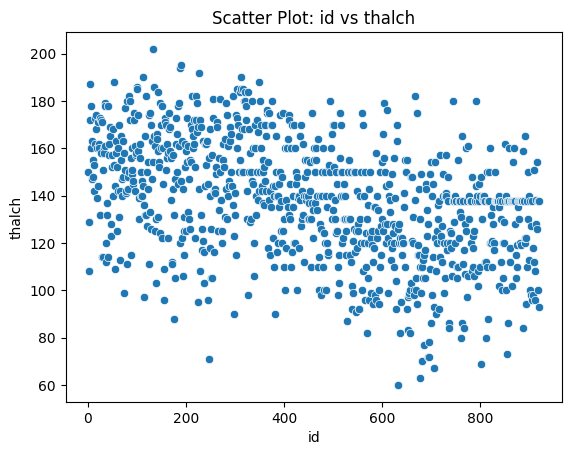

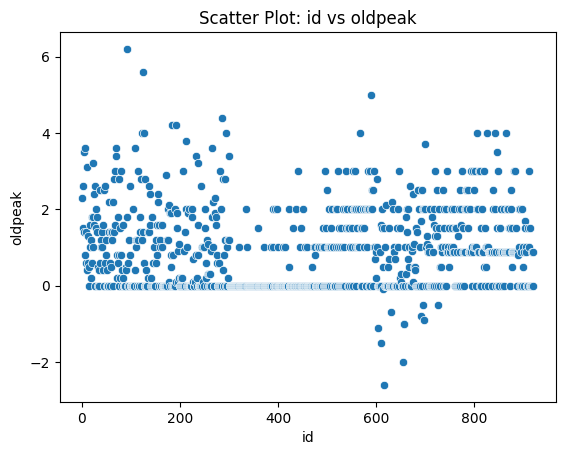

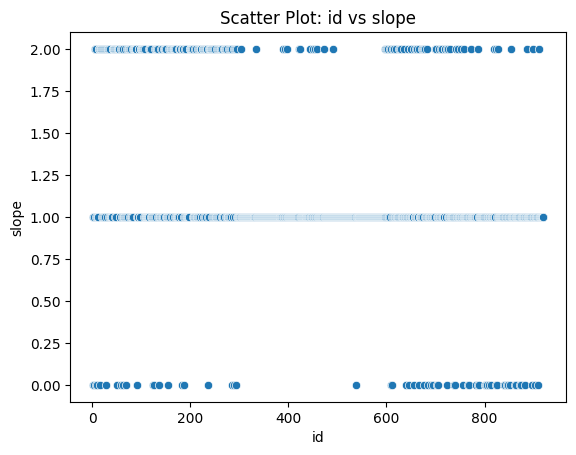

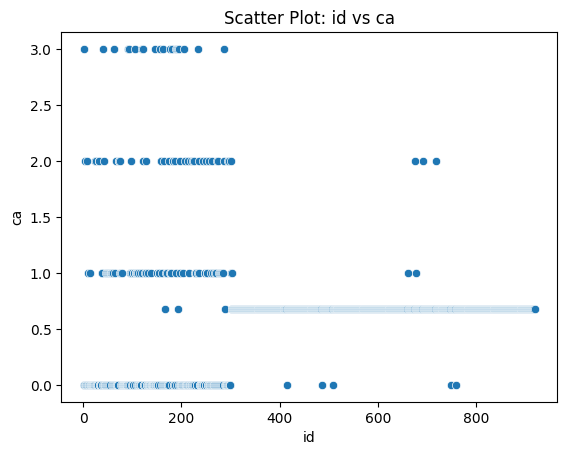

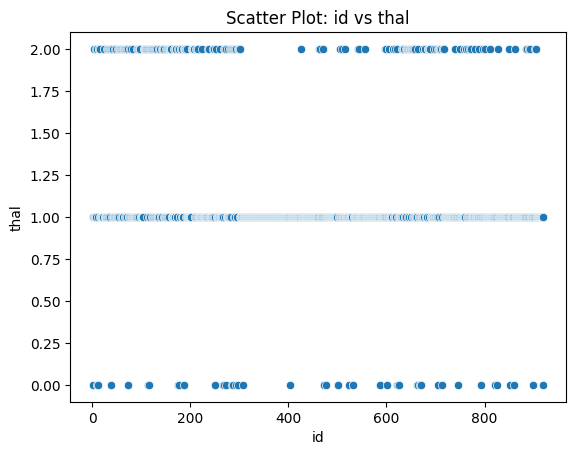

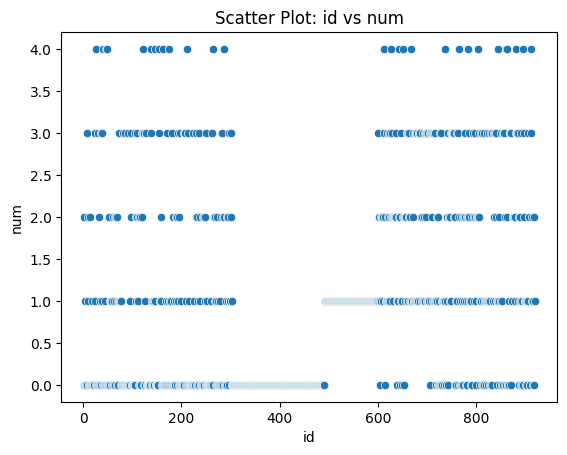

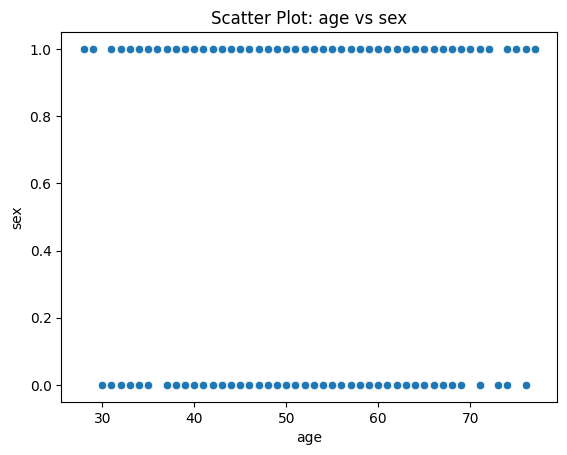

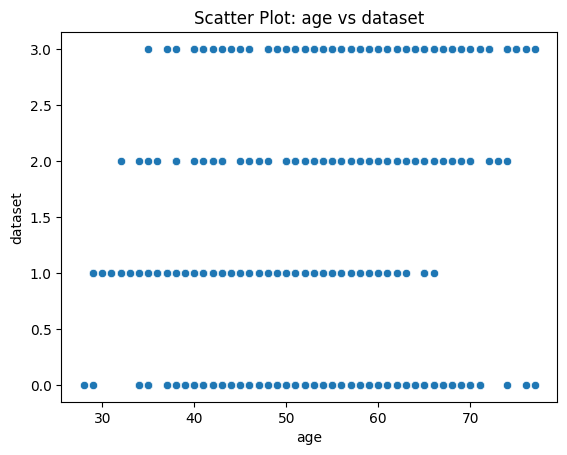

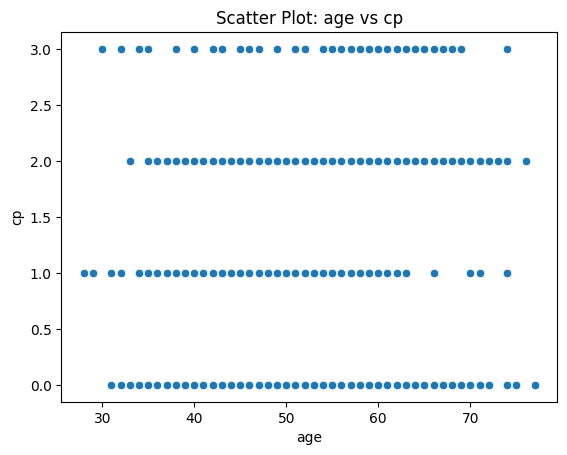

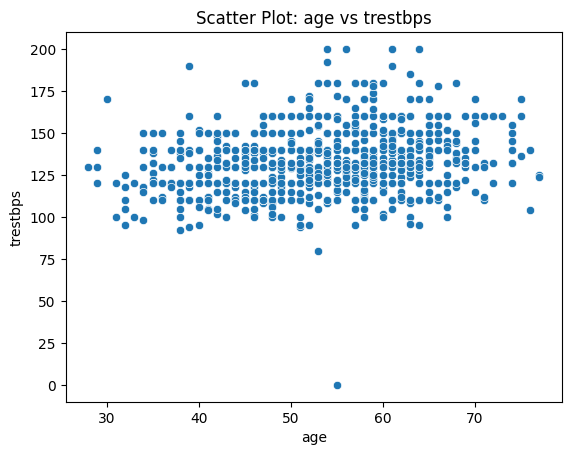

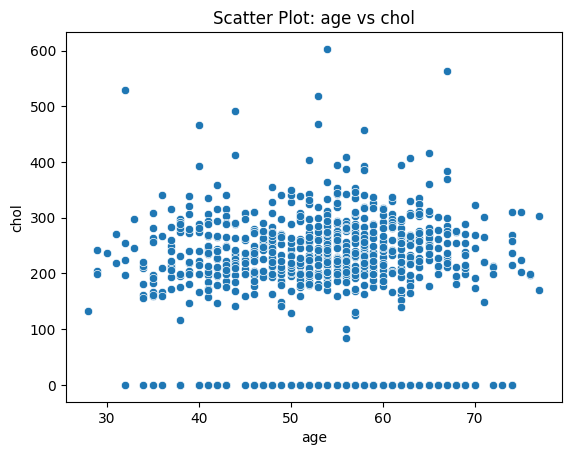

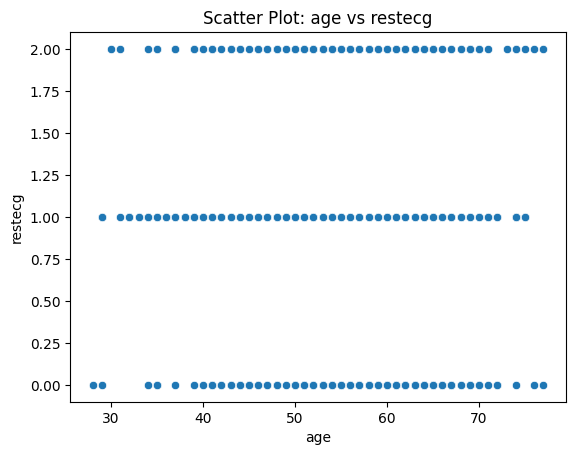

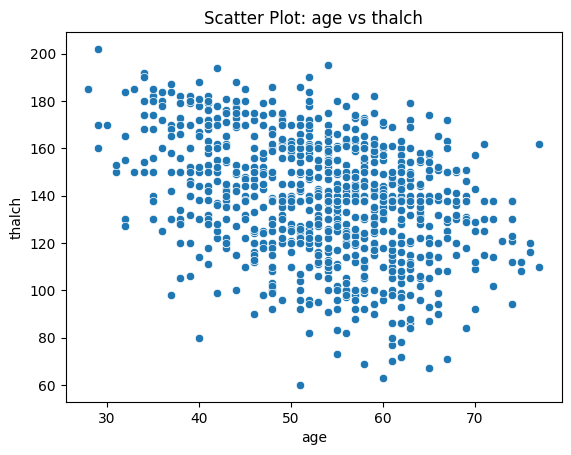

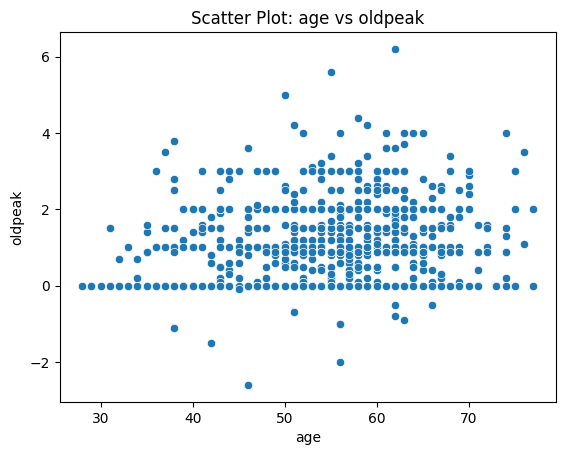

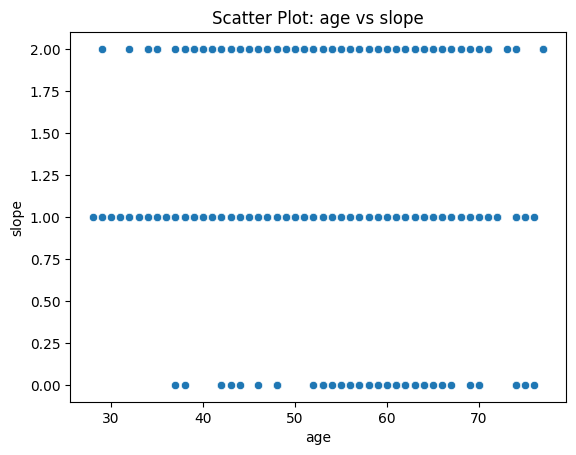

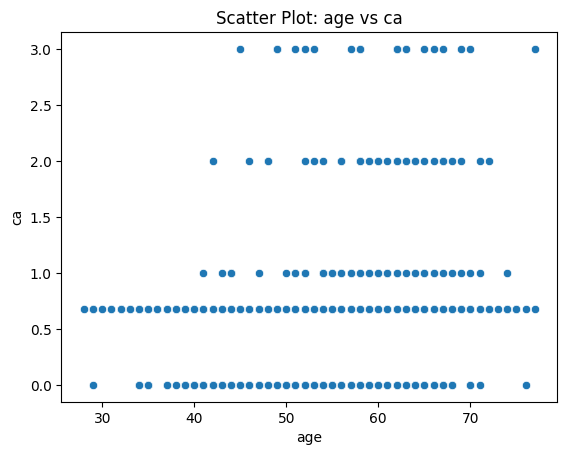

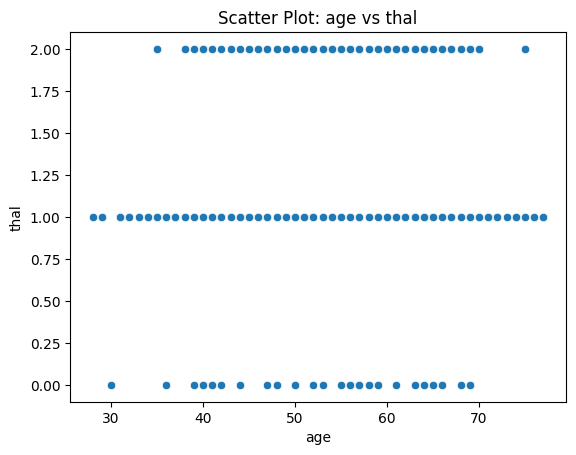

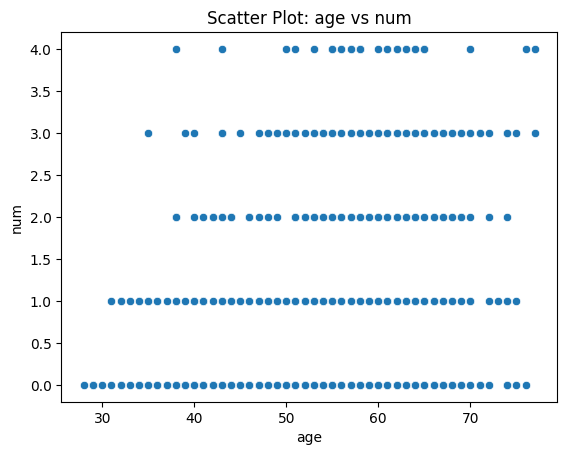

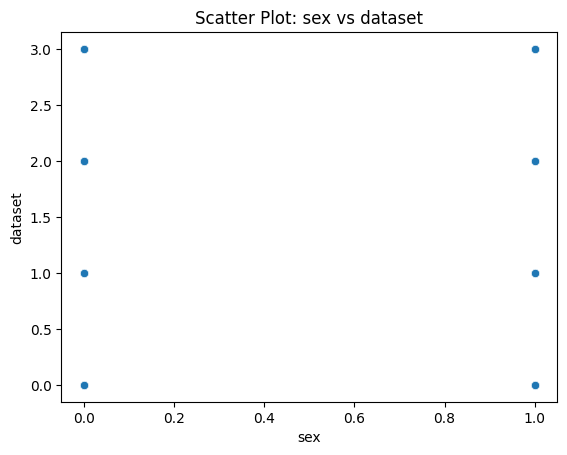

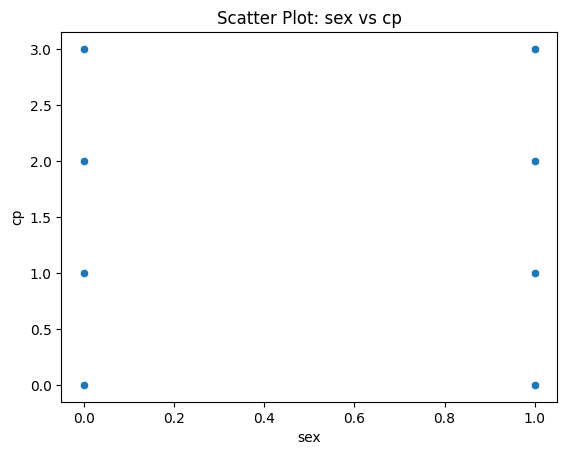

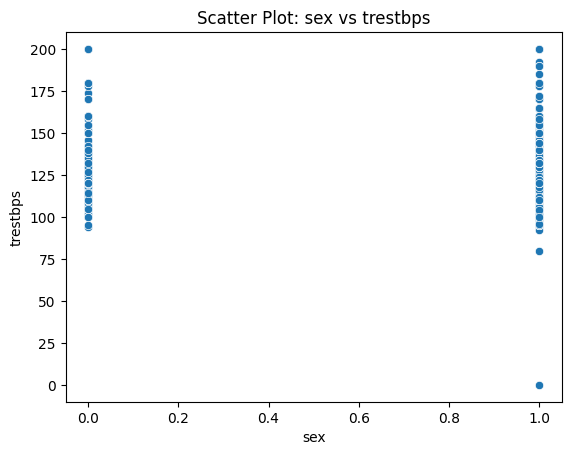

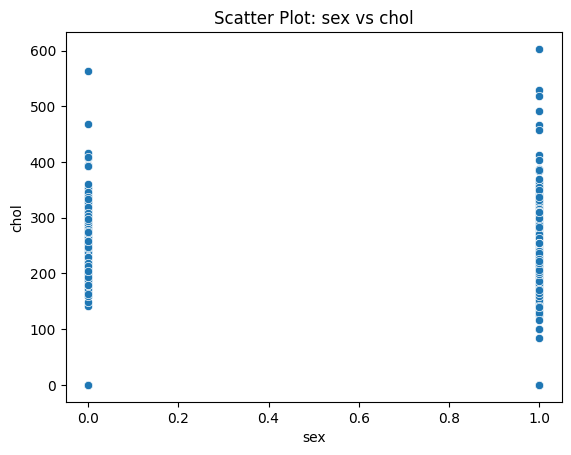

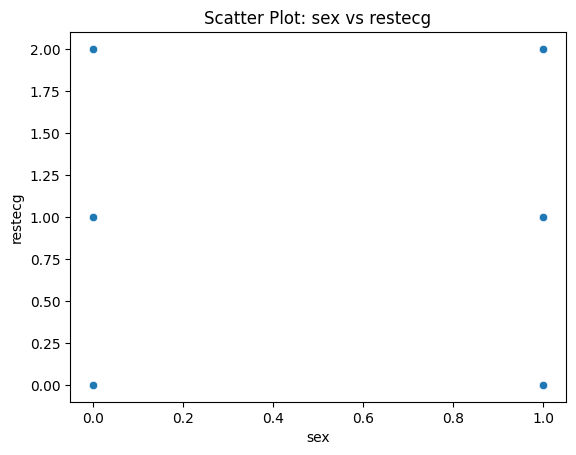

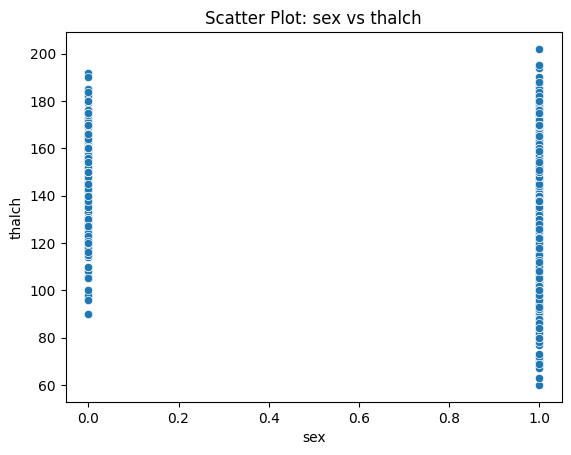

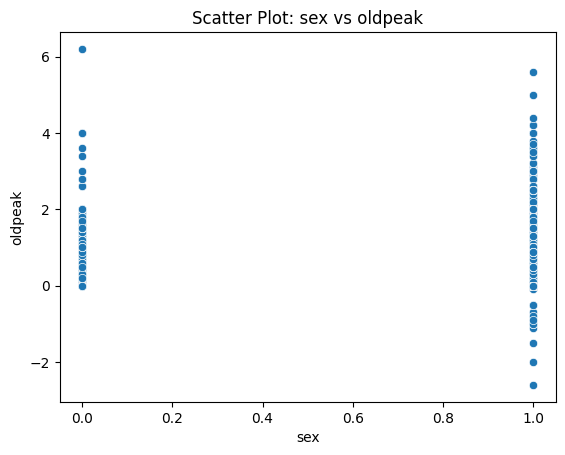

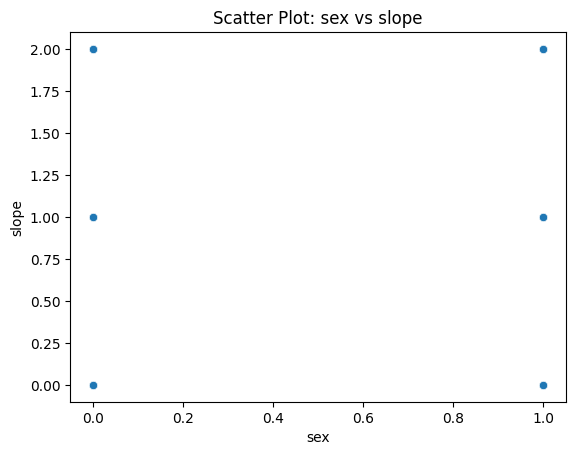

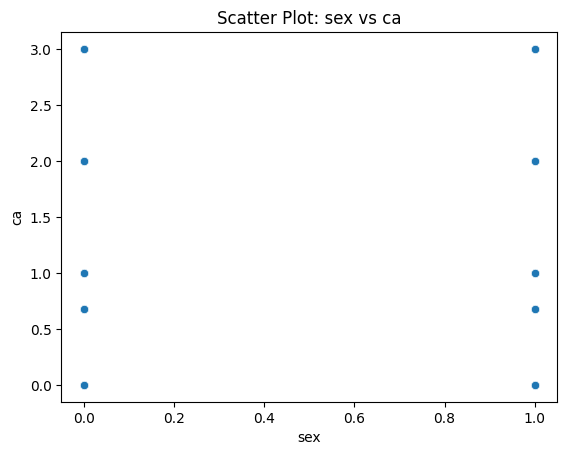

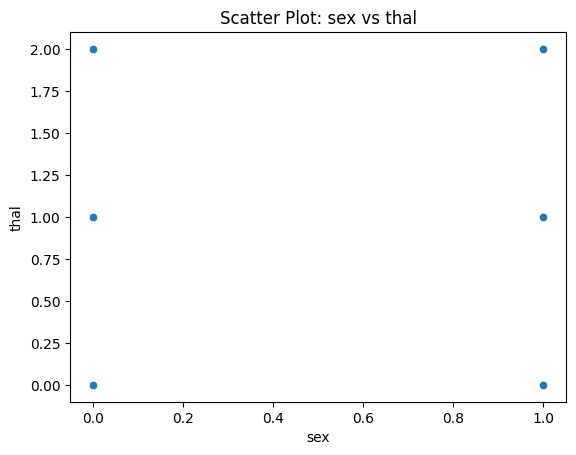

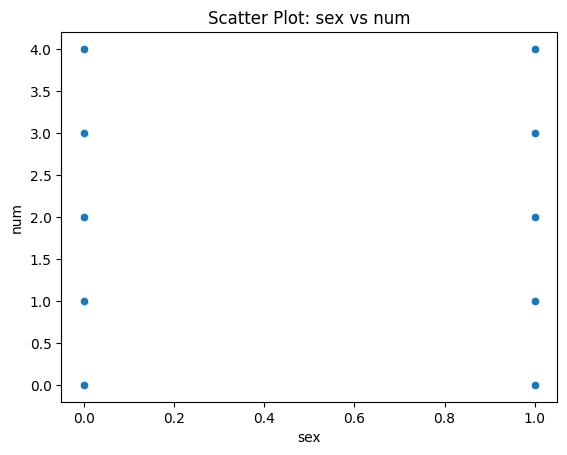

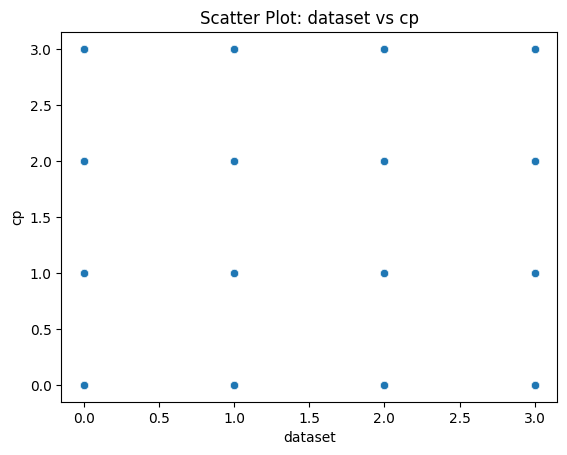

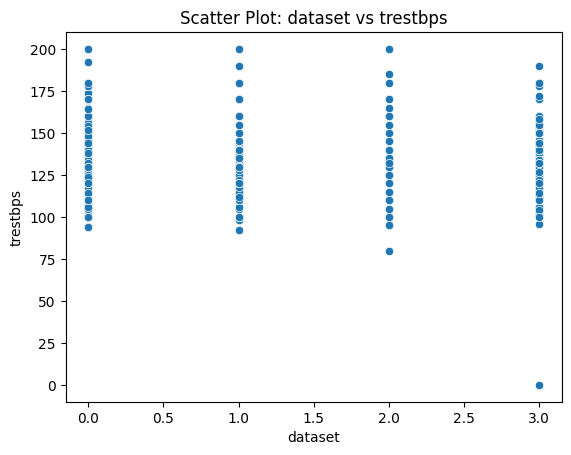

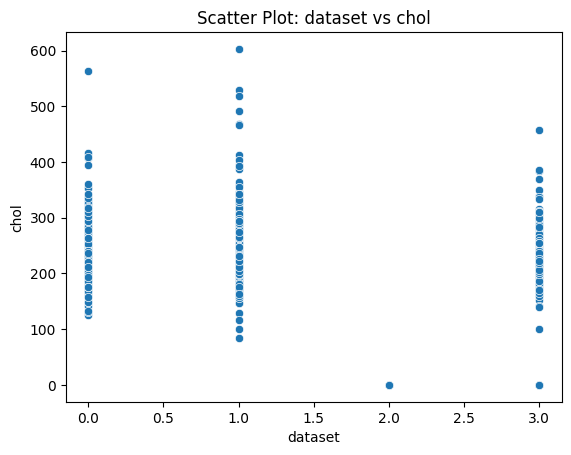

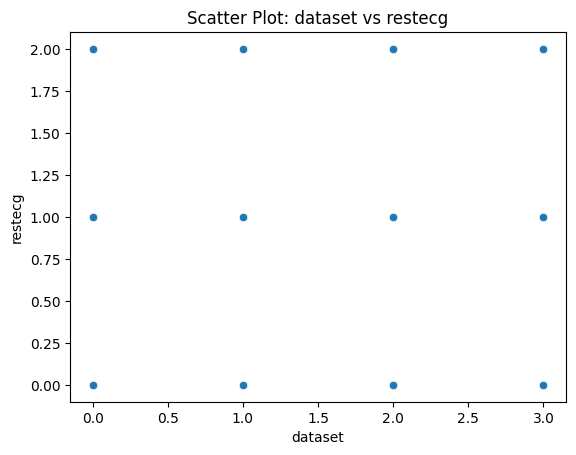

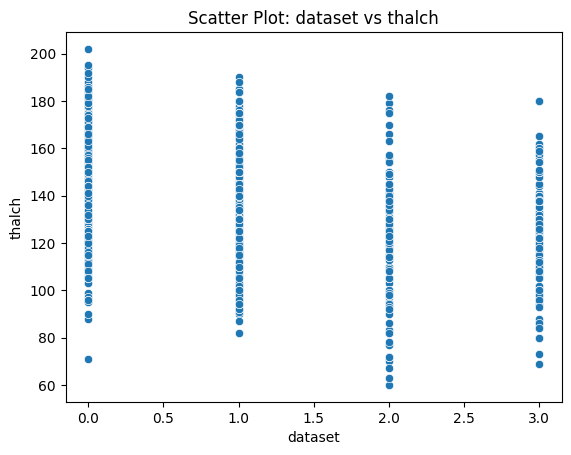

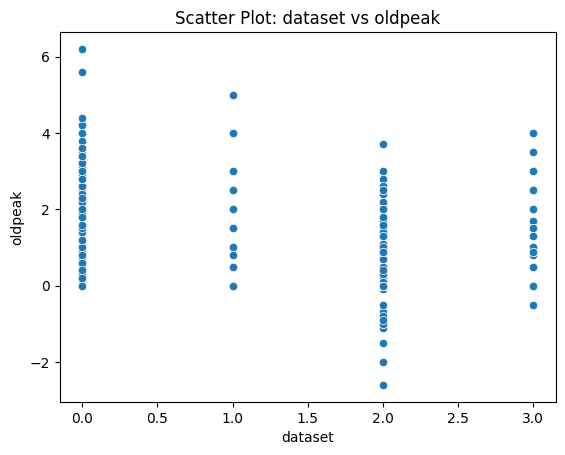

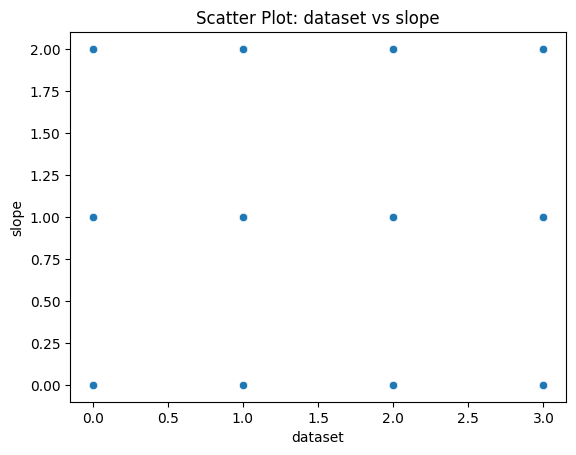

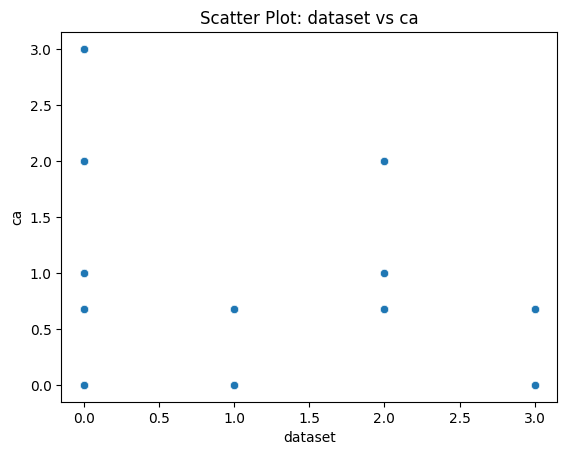

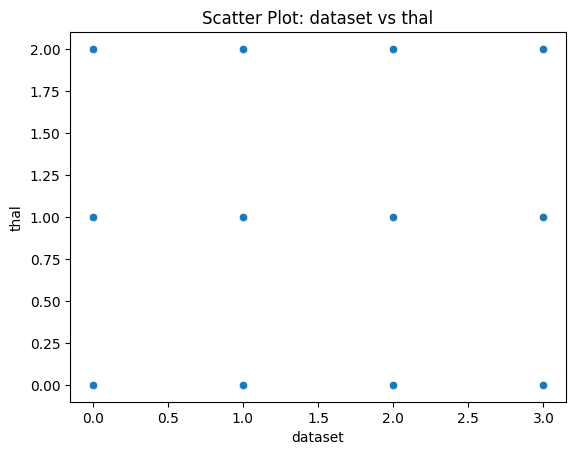

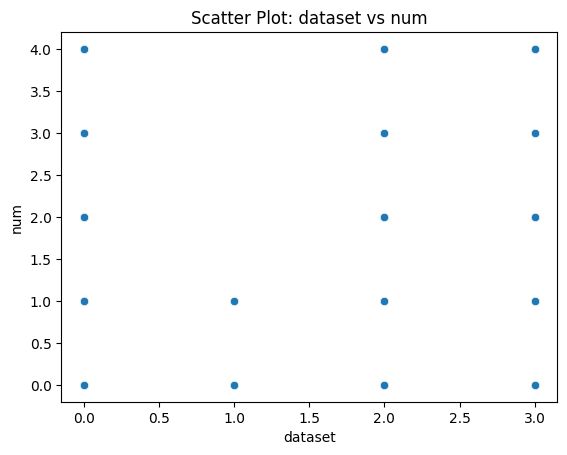

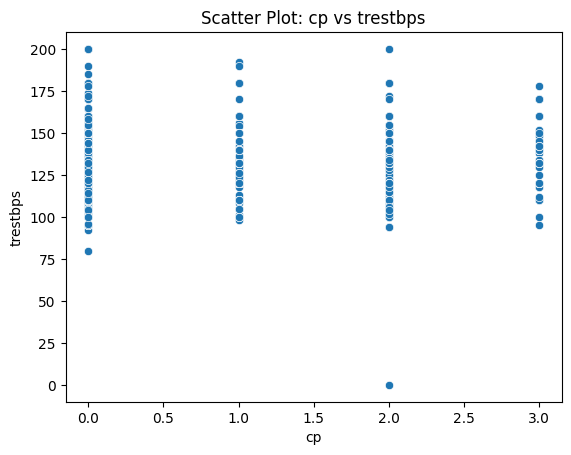

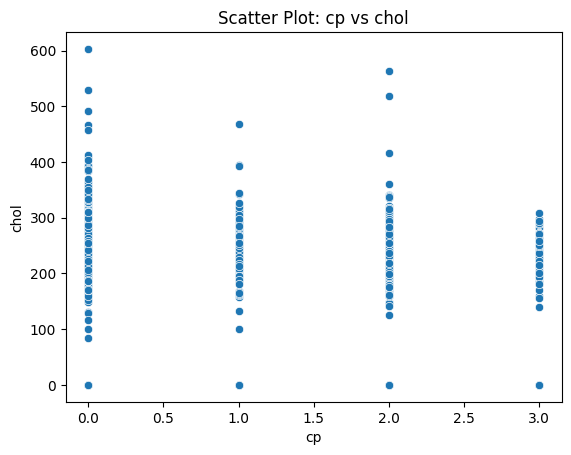

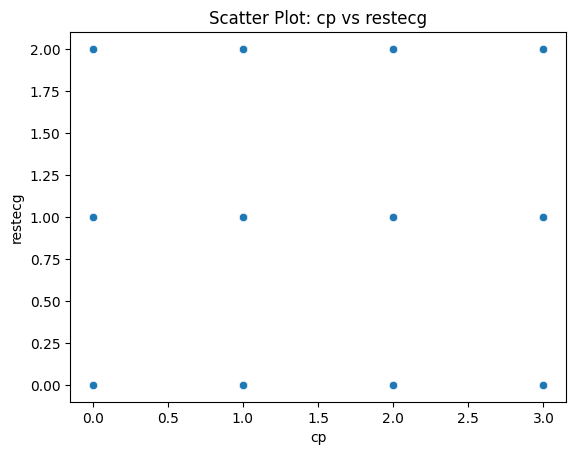

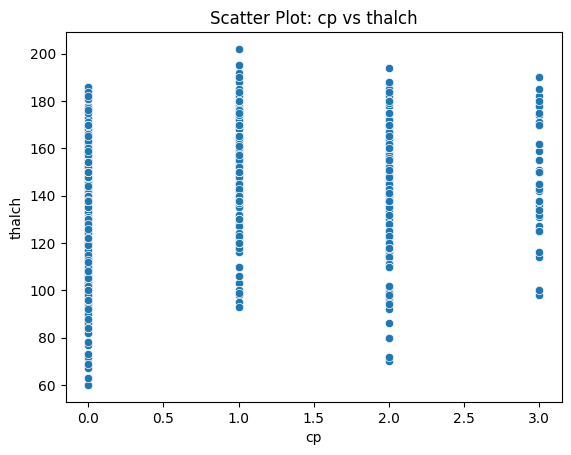

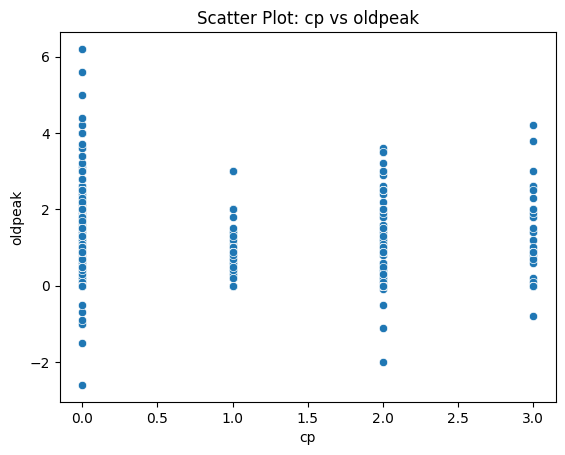

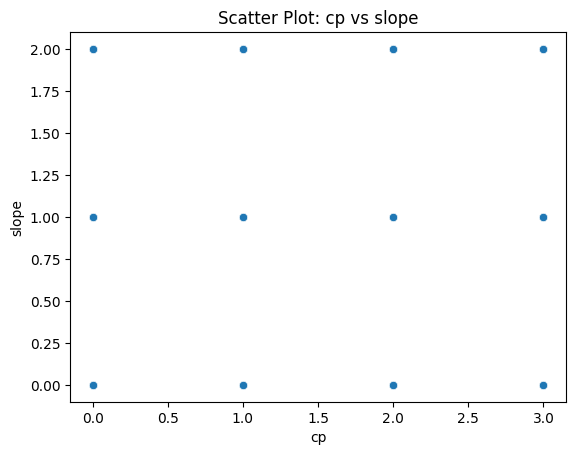

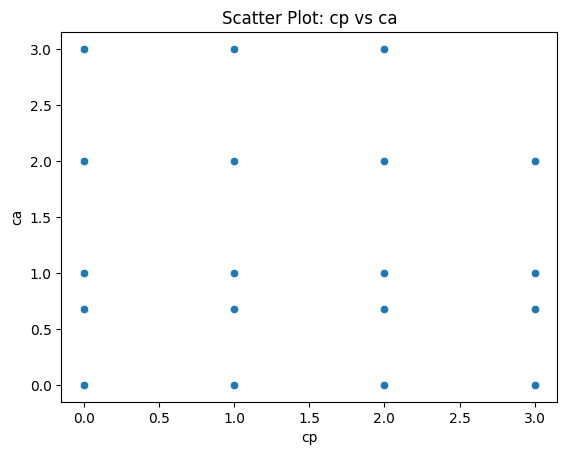

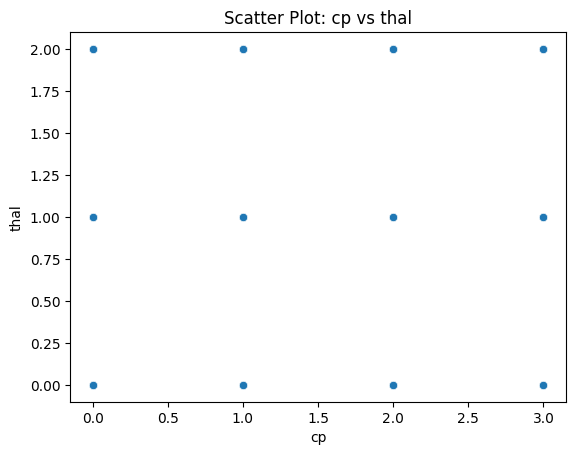

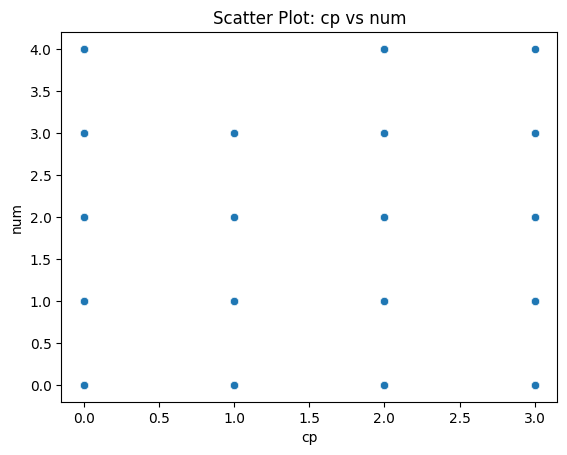

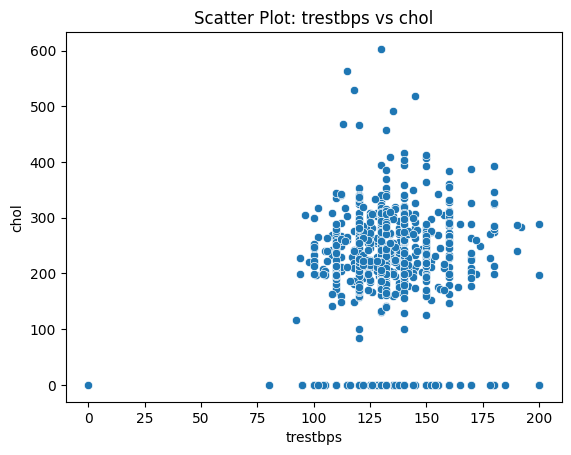

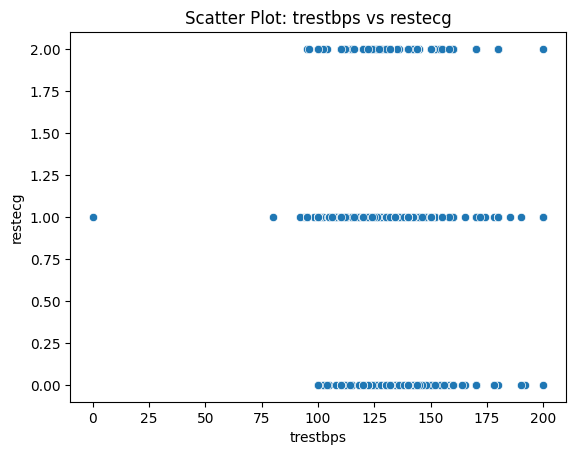

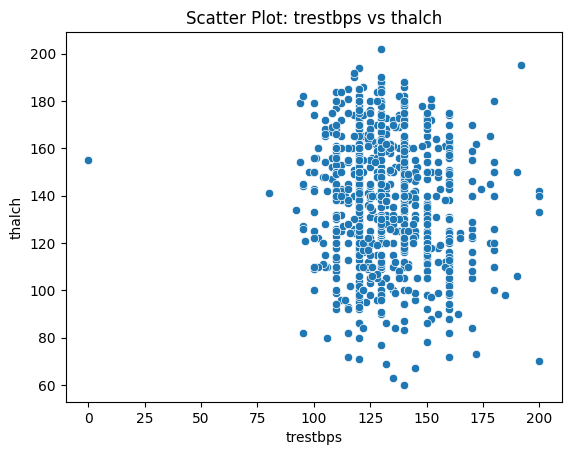

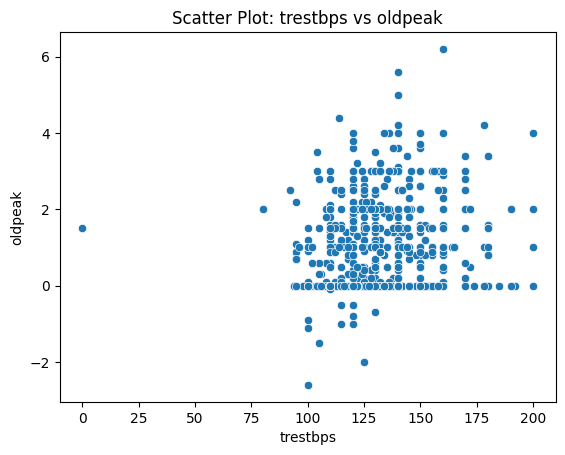

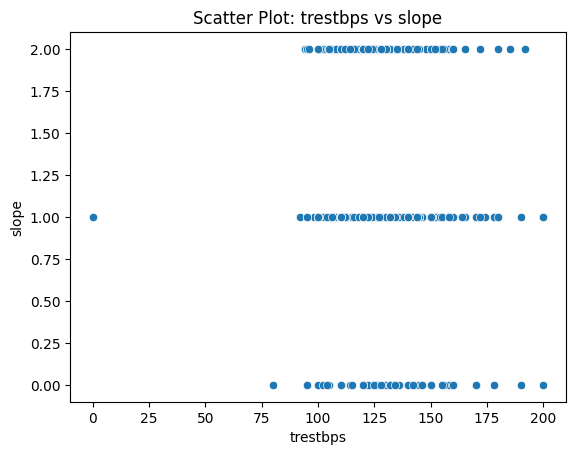

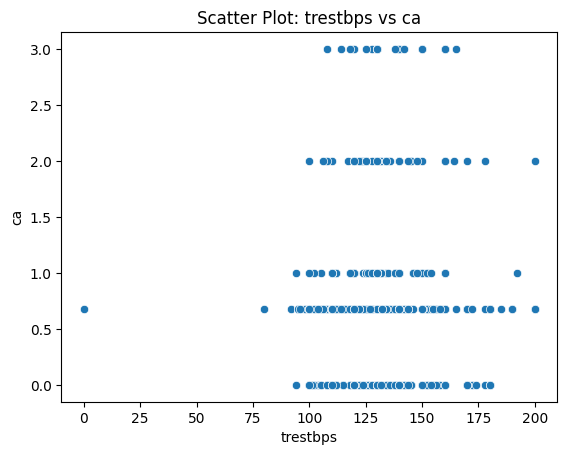

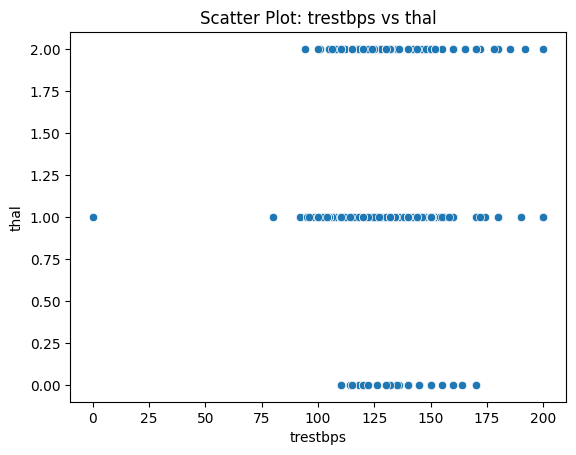

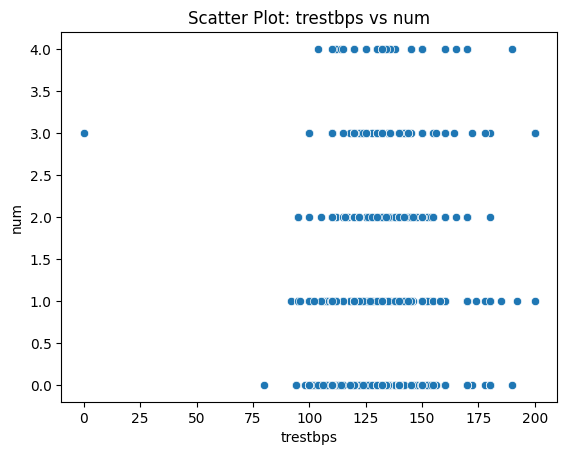

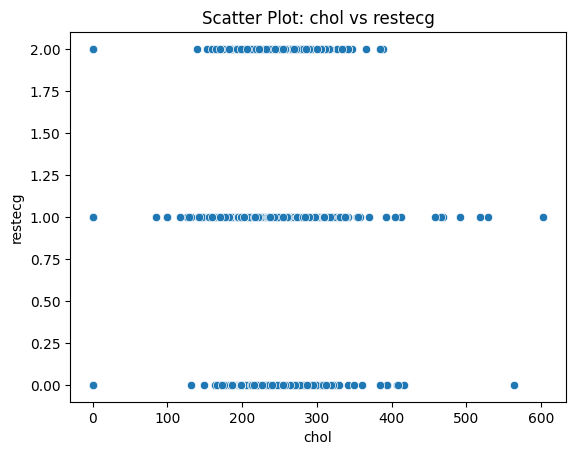

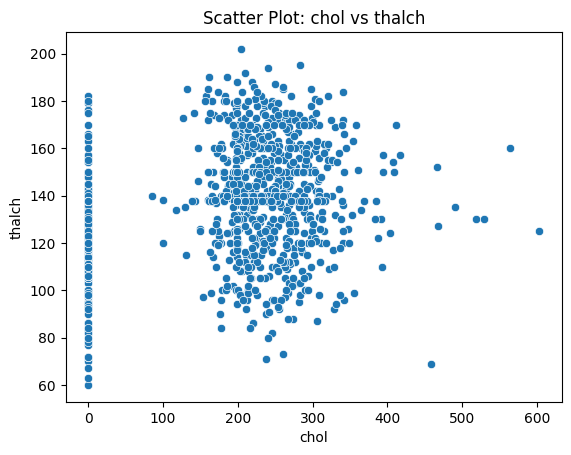

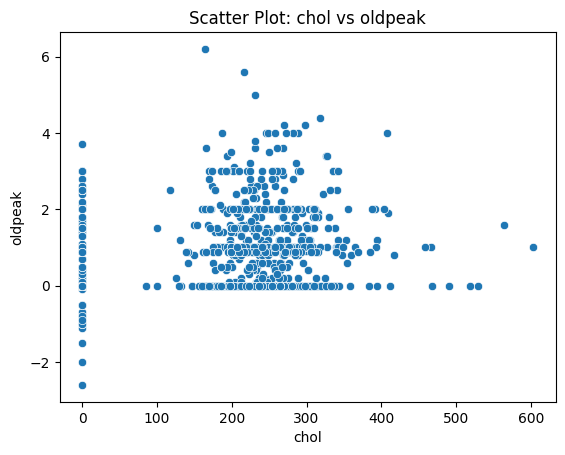

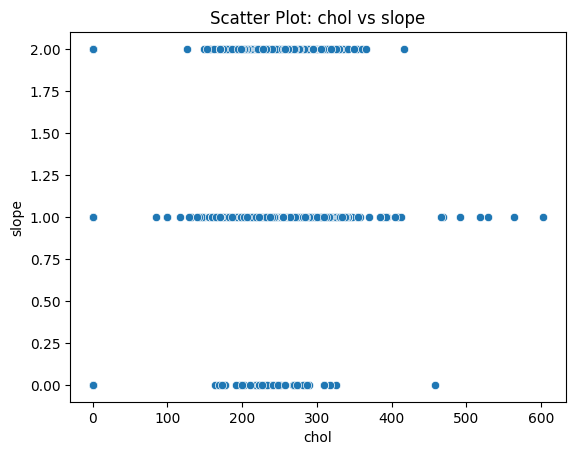

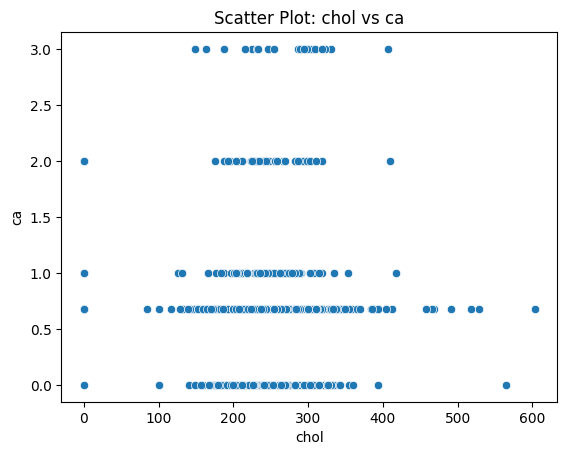

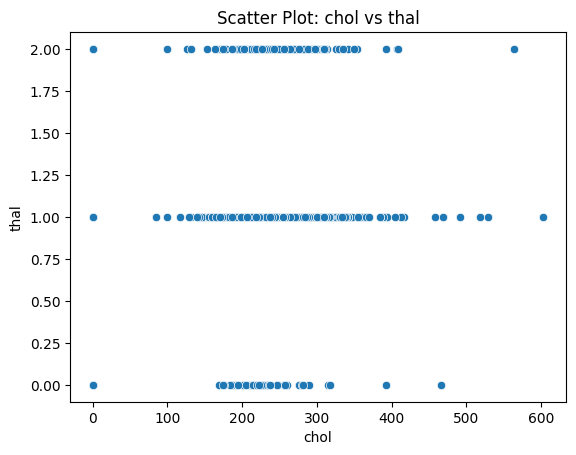

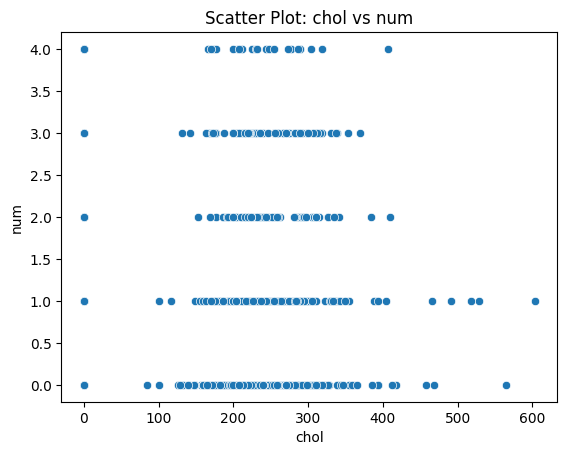

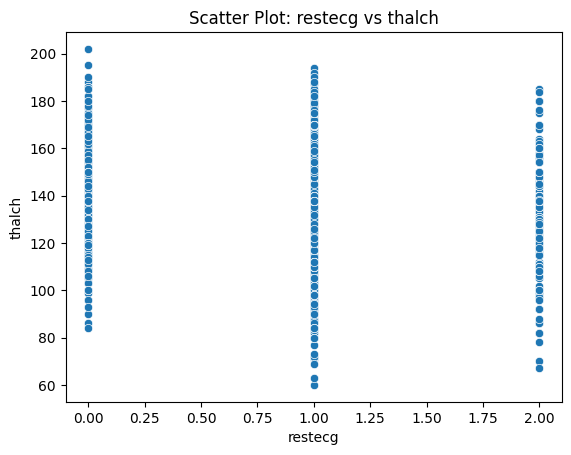

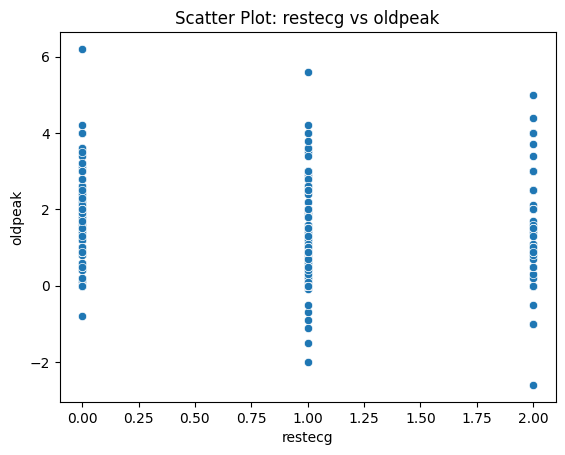

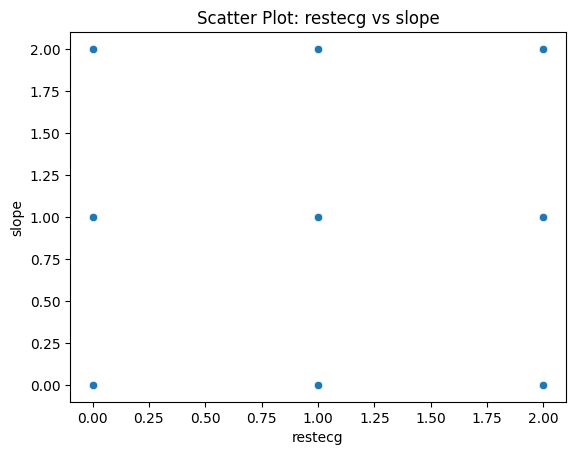

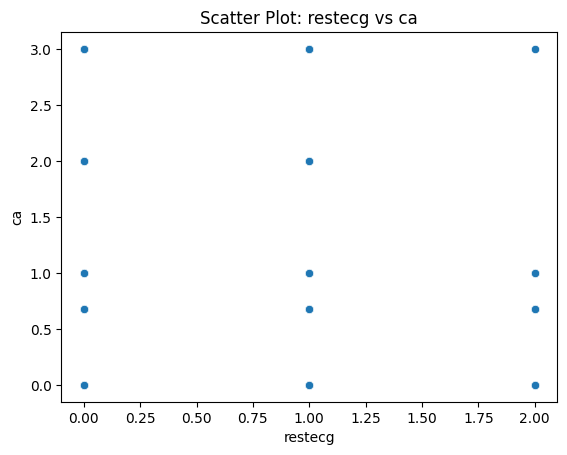

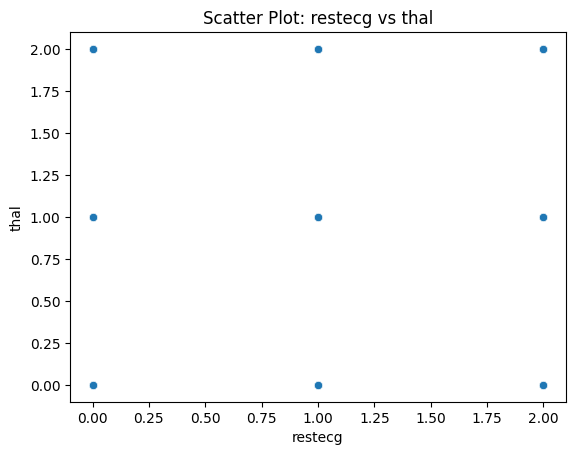

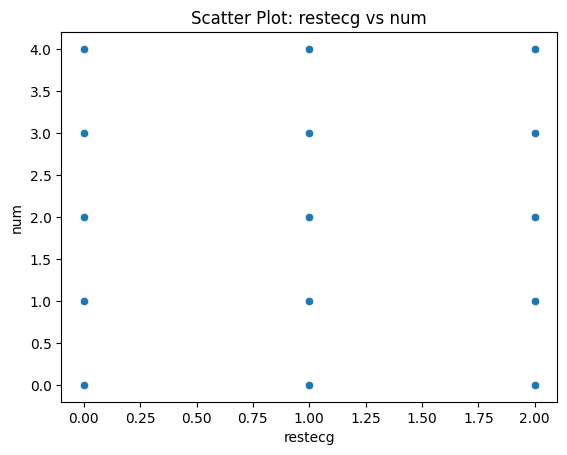

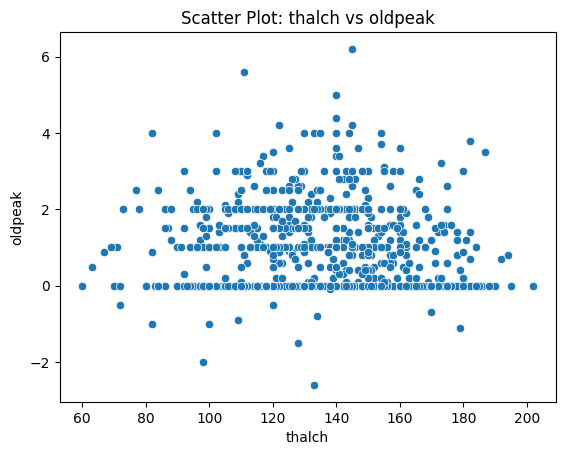

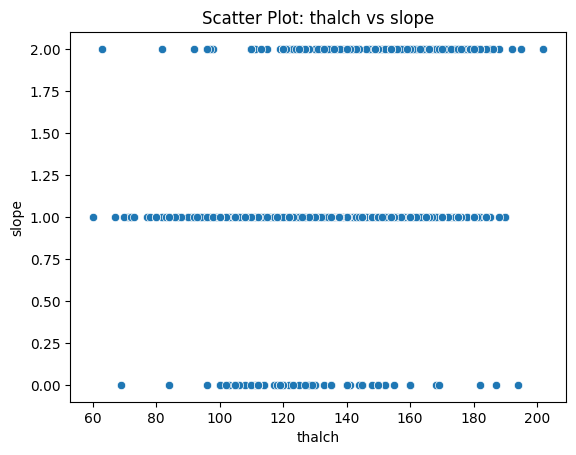

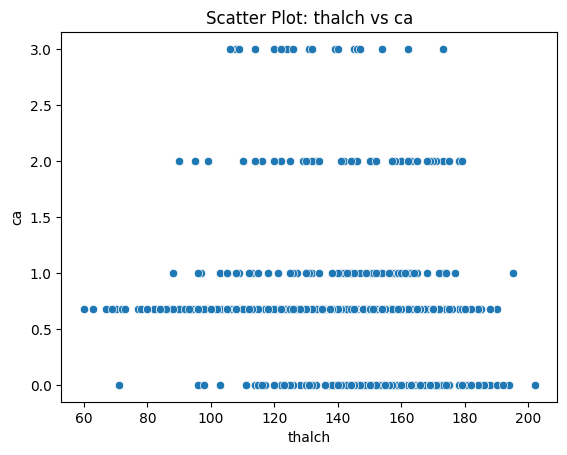

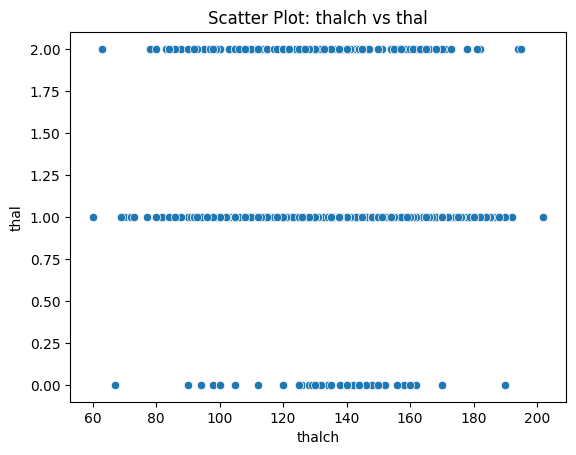

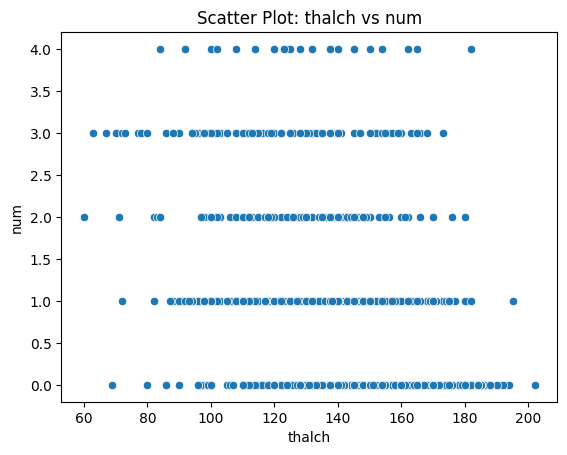

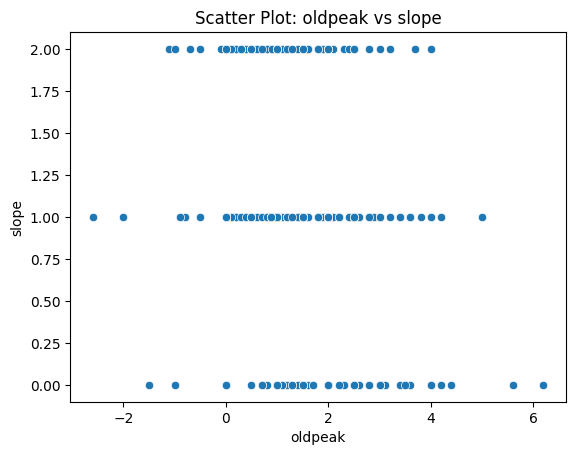

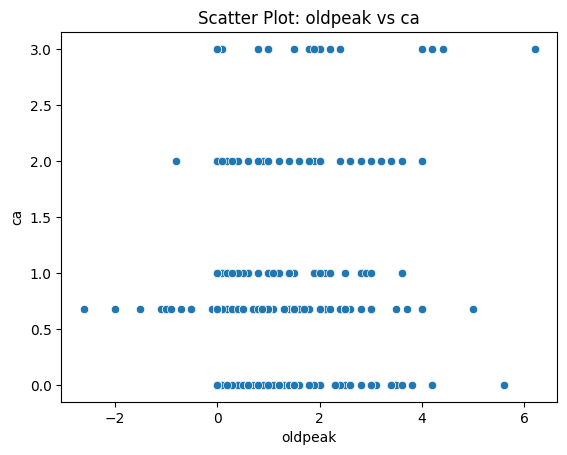

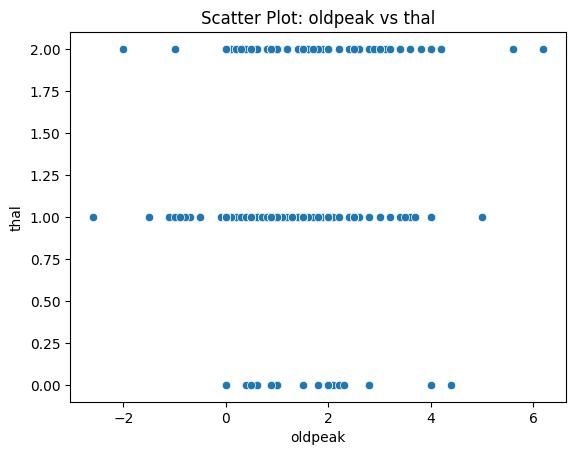

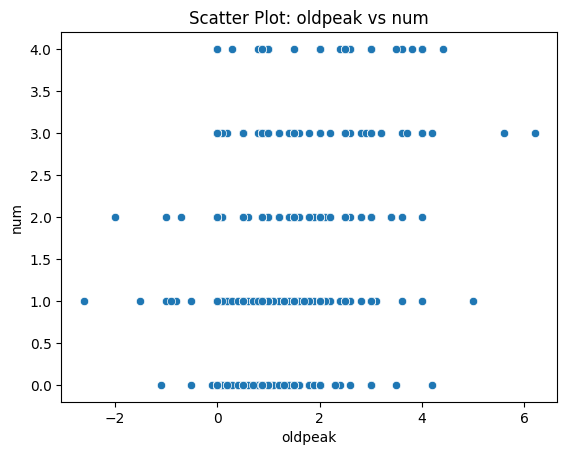

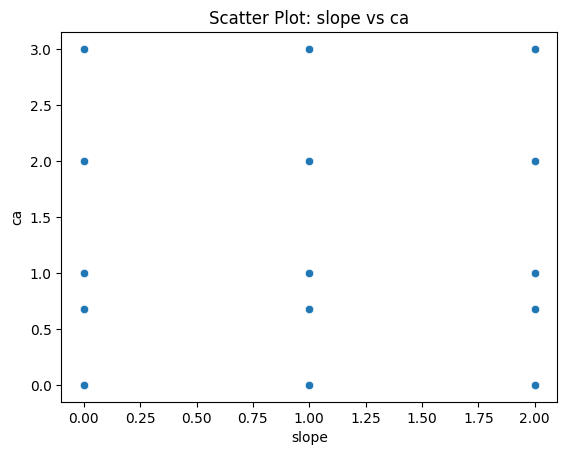

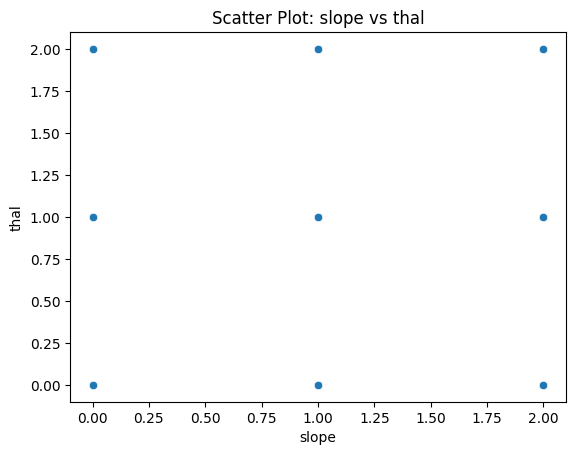

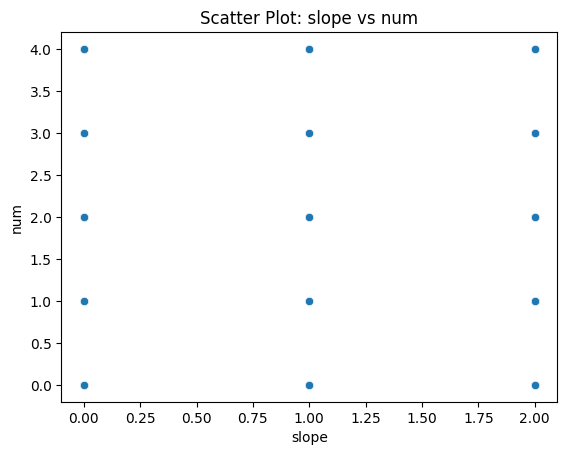

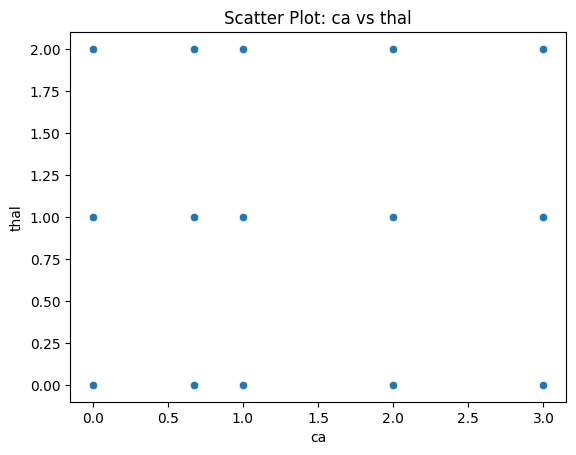

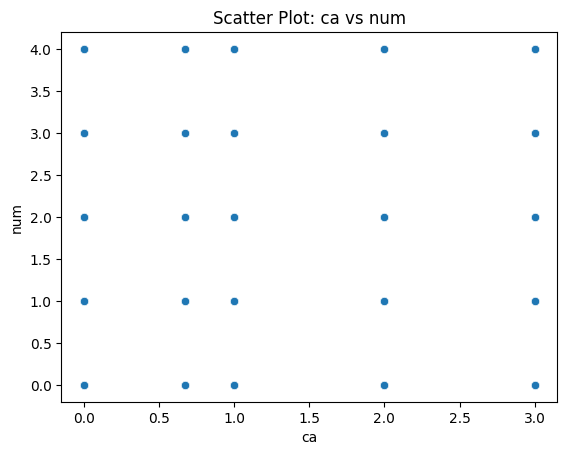

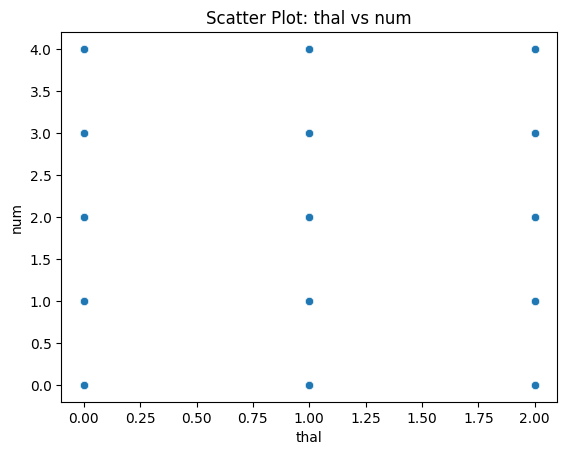

In [68]:
#Scatter Plots for Pairwise Relationships
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
for i, col1 in enumerate(num_columns):
    for col2 in num_columns[i+1:]:
        plt.figure()
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f"Scatter Plot: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()


'Target' column not found
'Target' column added based on age > 50 condition.


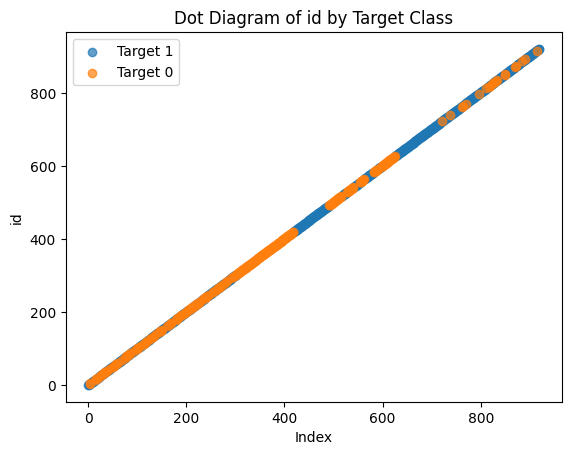

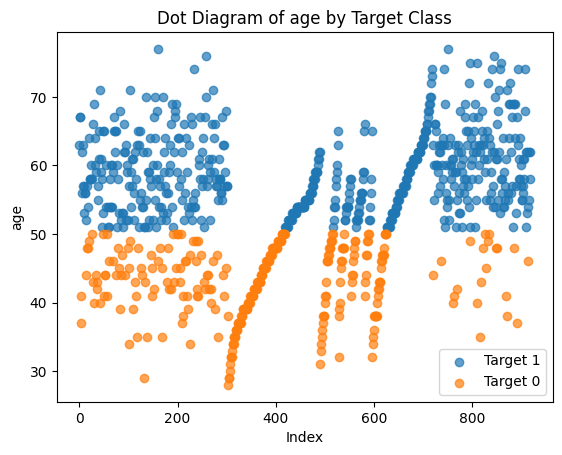

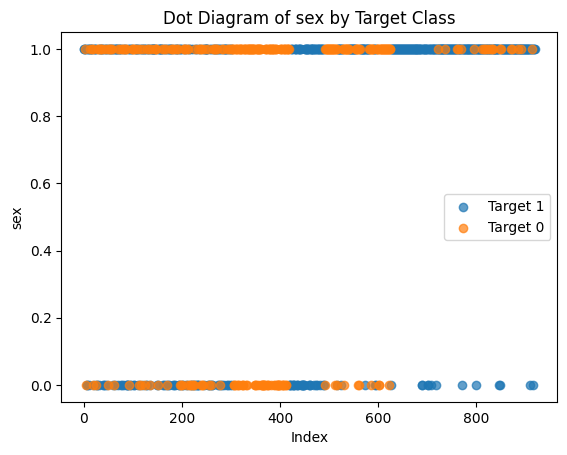

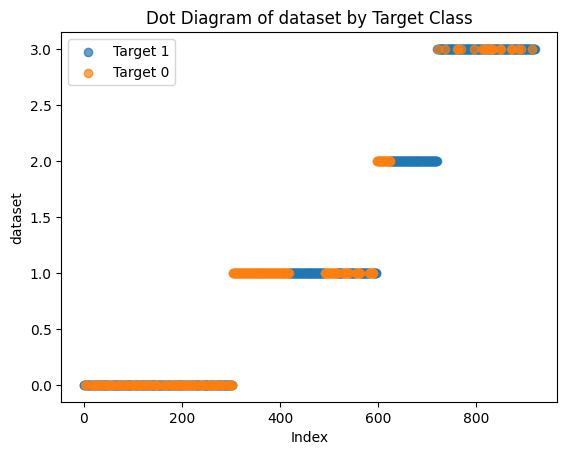

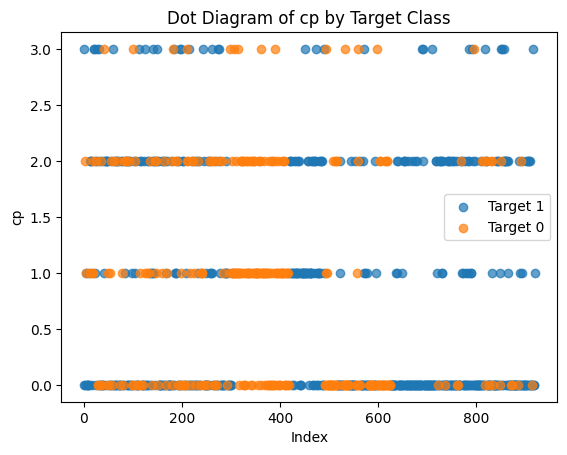

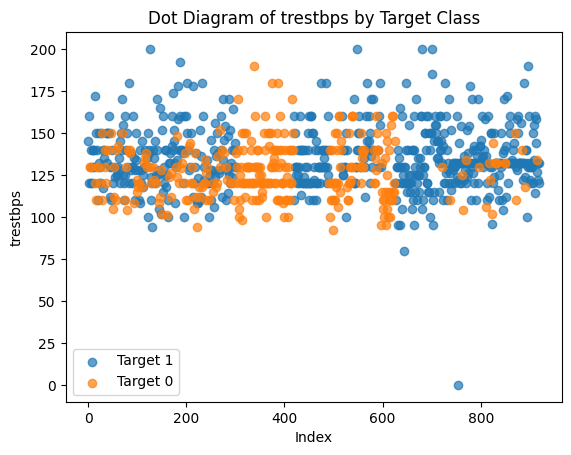

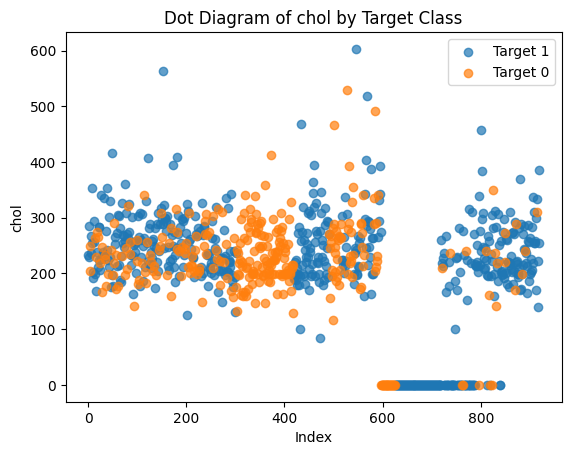

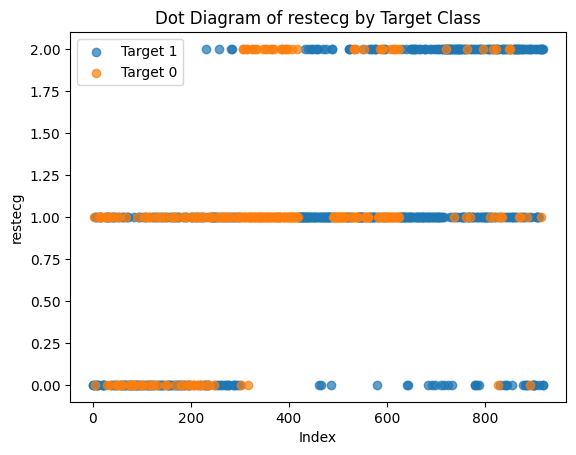

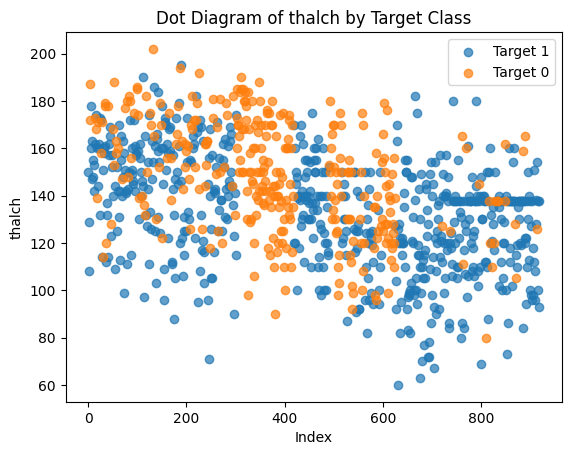

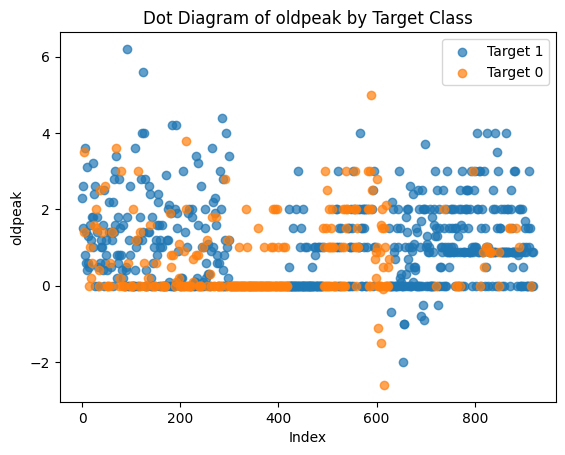

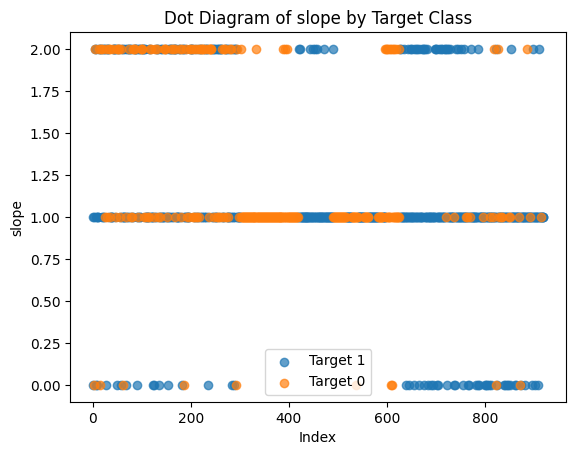

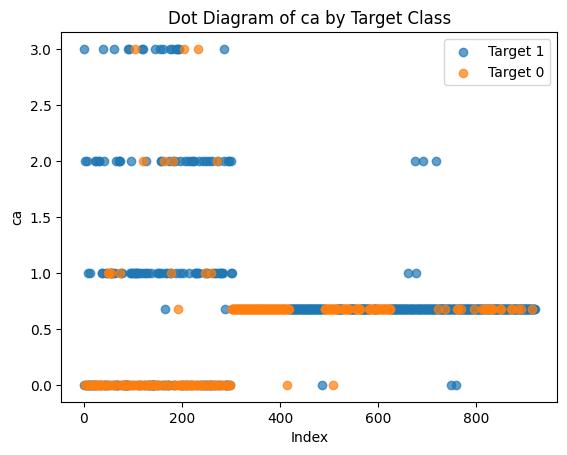

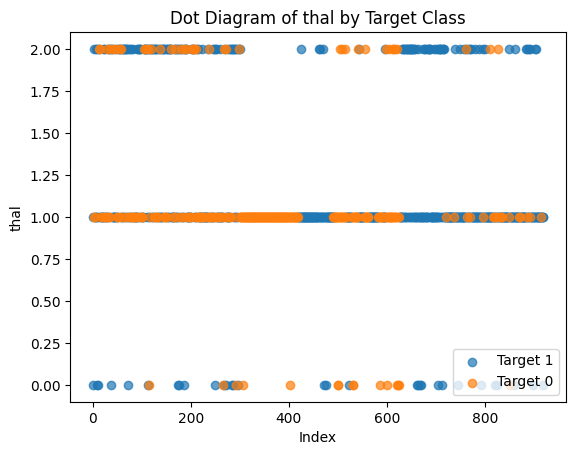

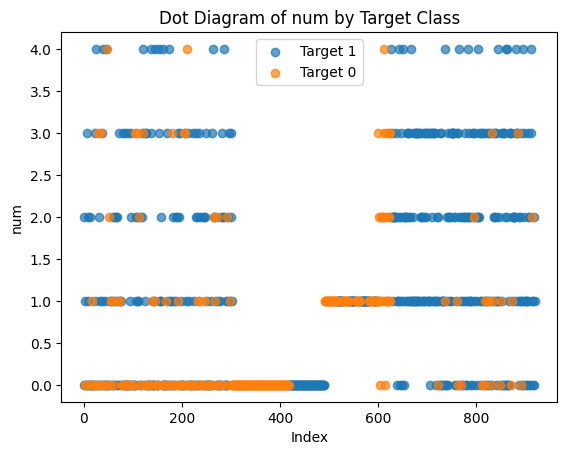

In [69]:
# Adding Target Column if Missing
if 'target' not in df.columns:
    print("\n'Target' column not found")
    df['target'] = np.where(df['age'] > 50, 1, 0)  # Example condition: age > 50
    print("'Target' column added based on age > 50 condition.")
else:
    print("\n'Target' column already exists.")

#Dot Diagrams Depending on Target Class
target_class = df['target'].unique()
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    if column != 'target':
        plt.figure()
        for target in target_class:
            subset = df[df['target'] == target]
            plt.scatter(subset.index, subset[column], label=f"Target {target}", alpha=0.7)
        plt.title(f"Dot Diagram of {column} by Target Class")
        plt.xlabel("Index")
        plt.ylabel(column)
        plt.legend()
        plt.show()